**Hong Phuc Pham - #a1843625**

# Preprocessing and loading data

In [ ]:
## For running on google colab
from google.colab import drive
import os
drive.mount('/content/drive')

!pip install ipython-autotime
%load_ext autotime
os.chdir("/content/drive/MyDrive/Uni/DL/A2")

Mounted at /content/drive
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.6 MB 4.1 MB/s 
time: 593 ms (started: 2022-10-15 02:55:03 +00:00)


In [ ]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os, time
import pandas as pd

# Our new Deep Learning imports
import tensorflow as tf
from tensorflow import keras

# To plot nice figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
import seaborn as sns; sns.set()

# Clustering methods
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import cluster, mixture, manifold, random_projection

from scipy.cluster.hierarchy import dendrogram, linkage

time: 3.39 s (started: 2022-10-15 02:55:04 +00:00)


In [ ]:
# Check the versions are OK (both should be 2 or more)
print(tf.__version__)
print(keras.__version__)

2.9.2
2.9.0
time: 927 µs (started: 2022-10-15 02:55:07 +00:00)


In [ ]:
import string
## Loading data
big_set = pd.read_csv('sign_mnist_train.csv')
test_set = pd.read_csv('sign_mnist_test.csv')
class_names = (list(string.ascii_uppercase)) ## <-- Class names here
class_names = np.array(class_names)

time: 4.64 s (started: 2022-10-15 02:55:07 +00:00)


In [ ]:
# Check if the data in range(0,255)
print("Max values of dataframe:",big_set.max().max())
print("Min values of dataframe:",big_set.min().min())

Max values of dataframe: 255
Min values of dataframe: 0
time: 46.9 ms (started: 2022-10-15 02:55:12 +00:00)


In [ ]:
# Get data frame info
print(big_set.iloc[:,1:].info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27455 entries, 0 to 27454
Columns: 784 entries, pixel1 to pixel784
dtypes: int64(784)
memory usage: 164.2 MB
None
time: 45.6 ms (started: 2022-10-15 02:55:12 +00:00)


In [ ]:
# Check for NaN under an entire DataFrame
print("Nan values exist:",big_set.isnull().values.any())

Nan values exist: False
time: 7.69 ms (started: 2022-10-15 02:55:12 +00:00)


In [ ]:
# Counting unique labels 
unique, counts = np.unique(big_set['label'], return_counts=True)
print (np.column_stack((unique, counts)))

[[   0 1126]
 [   1 1010]
 [   2 1144]
 [   3 1196]
 [   4  957]
 [   5 1204]
 [   6 1090]
 [   7 1013]
 [   8 1162]
 [  10 1114]
 [  11 1241]
 [  12 1055]
 [  13 1151]
 [  14 1196]
 [  15 1088]
 [  16 1279]
 [  17 1294]
 [  18 1199]
 [  19 1186]
 [  20 1160]
 [  21 1082]
 [  22 1225]
 [  23 1164]
 [  24 1118]
 [ 200    1]]
time: 3.11 ms (started: 2022-10-15 02:55:12 +00:00)


**Dicussion:**

As image data take alot of effort to collect, instead of deleting, attemption of resused or normalise, fix it would be more meaningful. In this case, there is only one wrong label detected, it could be easily manual updated.

In [ ]:
## Get image of error sample 
missS = big_set[big_set.label == 200]

time: 2.55 ms (started: 2022-10-15 02:55:12 +00:00)


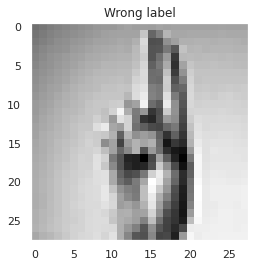

time: 431 ms (started: 2022-10-15 02:55:12 +00:00)


In [ ]:
## Print out them sample image (
plt.title(f"Wrong label")
plt.imshow(missS.iloc[:,1:].to_numpy(dtype=np.float64).reshape(28,28), cmap='gray')
plt.grid(False)
None

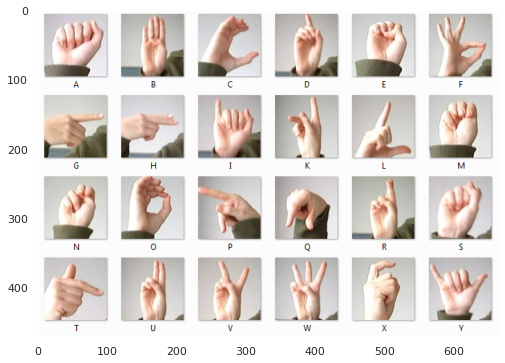

In [ ]:
## Plot the reference image for each character sign
import matplotlib.image as mpimg
plt.figure(figsize=(10, 6))
refImg = mpimg.imread('amer_sign2.png')
plt.imshow(refImg)
plt.grid(False)

In [ ]:
## This is U sign --> Update wrong label
big_set.loc[big_set['label'] == 200, 'label'] = int(np.where(class_names == 'U')[0])

time: 902 ms (started: 2022-10-15 02:55:12 +00:00)
time: 1.77 ms (started: 2022-10-15 02:55:13 +00:00)


In [ ]:
X_bSet = big_set.iloc[:,1:].to_numpy(dtype=np.float64)
y_bSet = big_set.iloc[:,0].to_numpy()
X_test = test_set.iloc[:,1:].to_numpy(dtype=np.float64)
y_test = test_set.iloc[:,0].to_numpy()

time: 78.4 ms (started: 2022-10-15 02:55:13 +00:00)


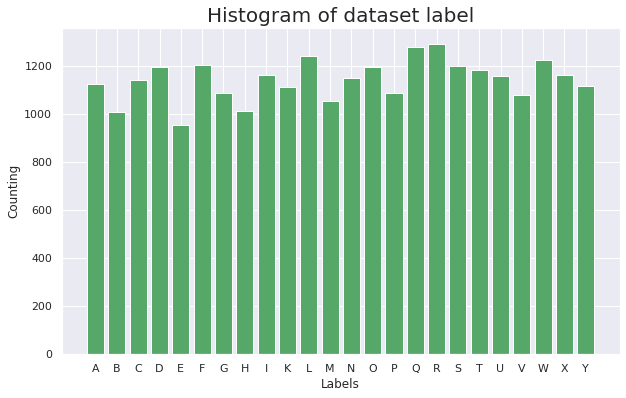

time: 269 ms (started: 2022-10-15 02:55:13 +00:00)


In [ ]:
from  collections import Counter
# visualise data
lCnt = np.array(sorted(Counter(big_set.label).items())) 
plt.figure(figsize=(10, 6))
plt.xlabel('Labels')
plt.ylabel('Counting')
plt.title('Histogram of dataset label', fontsize = 20)
plt.bar(class_names[lCnt[:,0]], lCnt[:,1], facecolor='g')
plt.show()

**Dicussion:**

Based on the histogram, the training dataset has a fair distribution of sample numbers. However, this uneven sample distribution might not fully represent all the features of the target objects. For example, through the reference image, some characters could be easily confused, and the classification wrong is: A - E - M - N - S, G and H, I and Y, P and Q, also V and W. Each member of these groups share visual base gesture within and extra features or fingers position. 

In [ ]:
# Convert 1D array of data to 2D matrix of image
imSet = X_bSet.reshape(len(X_bSet), 28,28)/255.0
X_test = X_test.reshape(len(X_test), 28,28)/255.0

time: 63.1 ms (started: 2022-10-15 02:55:14 +00:00)


In [ ]:
# Splitting train, valiation
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split( imSet, y_bSet, test_size=0.2, random_state=42)
print(f'Shapes are {[X_train.shape,y_train.shape,X_test.shape,y_test.shape,X_val.shape,y_val.shape]}')

Shapes are [(21964, 28, 28), (21964,), (7172, 28, 28), (7172,), (5491, 28, 28), (5491,)]
time: 232 ms (started: 2022-10-15 02:55:14 +00:00)


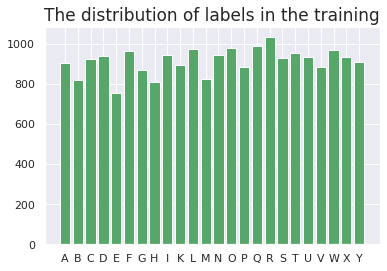

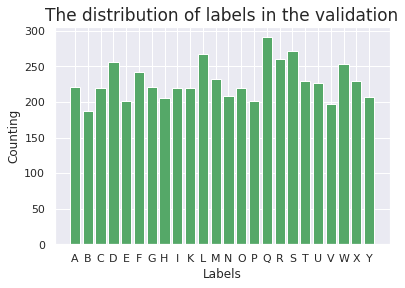

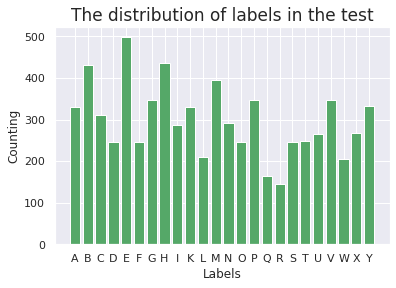

time: 690 ms (started: 2022-10-15 02:55:14 +00:00)


In [ ]:
plt.title("The distribution of labels in the training",fontsize = 17)
lTrain_Cnt = np.array(sorted(Counter(y_train).items())) 
plt.bar(class_names[lTrain_Cnt[:,0]], lTrain_Cnt[:,1], facecolor='g')
plt.show()


plt.title("The distribution of labels in the validation",fontsize = 17)
plt.xlabel('Labels')
plt.ylabel('Counting')
lVal_Cnt = np.array(sorted(Counter(y_val).items())) 
plt.bar(class_names[lVal_Cnt[:,0]], lVal_Cnt[:,1], facecolor='g')
plt.show()

plt.title("The distribution of labels in the test",fontsize = 17)
plt.xlabel('Labels')
plt.ylabel('Counting')
lTest_Cnt = np.array(sorted(Counter(y_test).items())) 
plt.bar(class_names[lTest_Cnt[:,0]], lTest_Cnt[:,1], facecolor='g')
plt.show()

In [ ]:
### Overal accuracy if every class got exactly 90% accuracy
sum(lTest_Cnt[:,1] //100 * 90) / sum(lTest_Cnt[:,1])

0.7529280535415505

time: 5.27 ms (started: 2022-10-15 02:55:15 +00:00)


**Dicussion:**

Base on the histogram, the train and validation dataset has a fair distribution of sample number. Whereas, test set has mixed sample, however, it will be acceptable as it is for testing purpose. For training, the dataset is big, then it will required long time for training. Batch size should be considering for the training later.

#  Initial model training

In [ ]:
# Simple model
model = keras.models.Sequential()   # This is a style of building networks - the easiest option
model.add(keras.layers.Flatten(input_shape = [28 , 28]))   # our inputs are 28 x 28 arrays, so need to become 1D
model.add(keras.layers.Dense(300, activation = "relu"))    # first hidden layer
model.add(keras.layers.Dense(100, activation = "relu"))    # second hidden layer
model.add(keras.layers.Dense(25, activation = "softmax"))  # output layer
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 25)                2525      
                                                                 
Total params: 268,125
Trainable params: 268,125
Non-trainable params: 0
_________________________________________________________________
time: 2.65 s (started: 2022-10-15 02:55:15 +00:00)


In [ ]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])
history = model.fit(X_train, y_train, epochs=15, validation_data=(X_val, y_val))

Epoch 1/15
687/687 [==============================] - 6s 4ms/step - loss: 2.7419 - accuracy: 0.2400 - val_loss: 2.2724 - val_accuracy: 0.3180
Epoch 2/15
687/687 [==============================] - 3s 4ms/step - loss: 1.8731 - accuracy: 0.4587 - val_loss: 1.6456 - val_accuracy: 0.4790
Epoch 3/15
687/687 [==============================] - 2s 3ms/step - loss: 1.4105 - accuracy: 0.5825 - val_loss: 1.3909 - val_accuracy: 0.5316
Epoch 4/15
687/687 [==============================] - 2s 3ms/step - loss: 1.1597 - accuracy: 0.6488 - val_loss: 1.1068 - val_accuracy: 0.6645
Epoch 5/15
687/687 [==============================] - 2s 3ms/step - loss: 0.9857 - accuracy: 0.6999 - val_loss: 1.1240 - val_accuracy: 0.6256
Epoch 6/15
687/687 [==============================] - 2s 3ms/step - loss: 0.8586 - accuracy: 0.7393 - val_loss: 0.8955 - val_accuracy: 0.7183
Epoch 7/15
687/687 [==============================] - 2s 3ms/step - loss: 0.7512 - accuracy: 0.7738 - val_loss: 0.9481 - val_accuracy: 0.6753
Epoch 

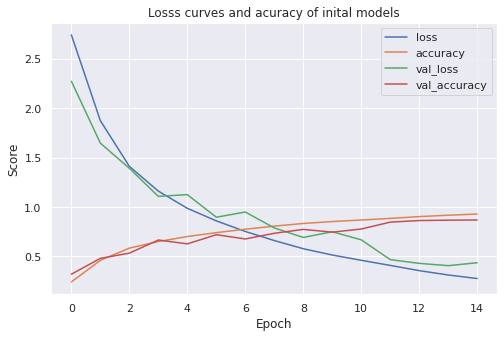

time: 243 ms (started: 2022-10-15 02:55:59 +00:00)


In [ ]:
pd.DataFrame(history.history).plot(figsize=(8 , 5))
plt.title("Losss curves and acuracy of inital models")
plt.xlabel('Epoch')
plt.ylabel('Score')
plt.show()

In [ ]:
# Loss and accuracy of test set
testres = model.evaluate(X_test, y_test, verbose=0)
print(testres)

[1.189261794090271, 0.6780535578727722]
time: 458 ms (started: 2022-10-15 02:55:59 +00:00)


1/1 [==============================] - 0s 67ms/step
Predictions: [ 6 20 10]
Prediction labels: ['G' 'U' 'K']
True labels: ['G' 'F' 'K']


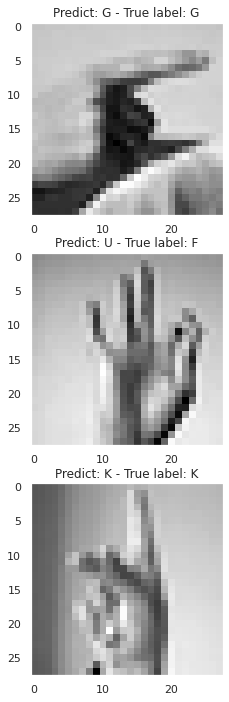

time: 653 ms (started: 2022-10-15 02:56:00 +00:00)


In [ ]:
# Output class predictions inspection
predict_x = model.predict(X_test[:3])  # use the first three test cases as an example
classes_x=np.argmax(predict_x,axis=1)
print(f'Predictions: {classes_x}')   # predicted classes
print(f'Prediction labels: {class_names[classes_x]}')   # names of these classes (prediction)
print(f'True labels: {class_names[y_test[:3]]}')   # names of true classes
# Display an image of the test samples

fig, ax = plt.subplots(len(predict_x), figsize=(16,12))
for i in range(len(predict_x)):
  ax[i].imshow(X_test[i].reshape((28,28)), cmap="gray")
  ax[i].set_title(f'Predict: {class_names[classes_x][i]} - True label: {class_names[y_test[i]]}')
  ax[i].grid(False)

In [ ]:
predict_x = model.predict(X_test)
X_pValue = np.argmax(predict_x,axis=1)

225/225 [==============================] - 0s 2ms/step
time: 591 ms (started: 2022-10-15 02:56:00 +00:00)


In [ ]:
import seaborn as sns
## FUNCTION - plotting classes accuracy and wrong pair heatmap
def classAcc_Cal(prediction, trueVal):
  
  # Count right matches
  y_count = Counter(trueVal)
  y_count[9] = 0
  y_count[25] = 0
  countL = [0] * 26
  wrongP = np.zeros((26, 26))
  for i in range(len(trueVal)):
    if(prediction[i] == trueVal[i]):
      countL[trueVal[i]] += 1
    else:
      wrongP[trueVal[i]][prediction[i]] += 1

  preTest_YArr = np.array(countL)
  test_YArr = np.array(sorted(y_count.items()))[:,1]
  test_classAcc = (preTest_YArr/test_YArr)*100
  test_classAcc[np.isnan(test_classAcc)] = 100.

  # visualise data
  plt.figure(figsize=(15, 11))

  plt.ylabel('Labels', fontsize = 15)
  plt.xlabel('Accuracy', fontsize = 15)
  plt.title('Classes prediction accuracy', fontsize = 20)
  plt.barh(class_names, test_classAcc, facecolor='g')
  for index, value in enumerate(test_classAcc):
      plt.text(value, index, f"{str(value):.05}")
  
  # visualise data

  sns.set_theme()
  plt.figure(figsize = (15,15))
  ax = sns.heatmap(wrongP, annot=True)
  ax.set_xticklabels(class_names)
  ax.set_yticklabels(class_names,rotation=0, horizontalalignment='right')
  plt.title('Wrong prediction heatmap', fontsize = 20)
  plt.ylabel('True labels')
  plt.xlabel('Predicted labels')
  plt.show()
  None

time: 2.93 ms (started: 2022-10-15 02:56:01 +00:00)


In [ ]:
y_count = Counter(y_test)
y_count[9] = 0
y_count[25] = 0
countL = [0] * 26
wrongP = np.zeros((26, 26))
for i in range(len(y_test)):
  if(X_pValue[i] == y_test[i]):
    countL[y_test[i]] += 1
  else:
    wrongP[y_test[i]][X_pValue[i]] += 1

preTest_YArr = np.array(countL)
test_YArr = np.array(sorted(y_count.items()))[:,1]
test_classAcc = (preTest_YArr/test_YArr)*100
test_classAcc[np.isnan(test_classAcc)] = 100.

time: 8.7 ms (started: 2022-10-15 02:56:01 +00:00)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in true_divide
  


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in true_divide


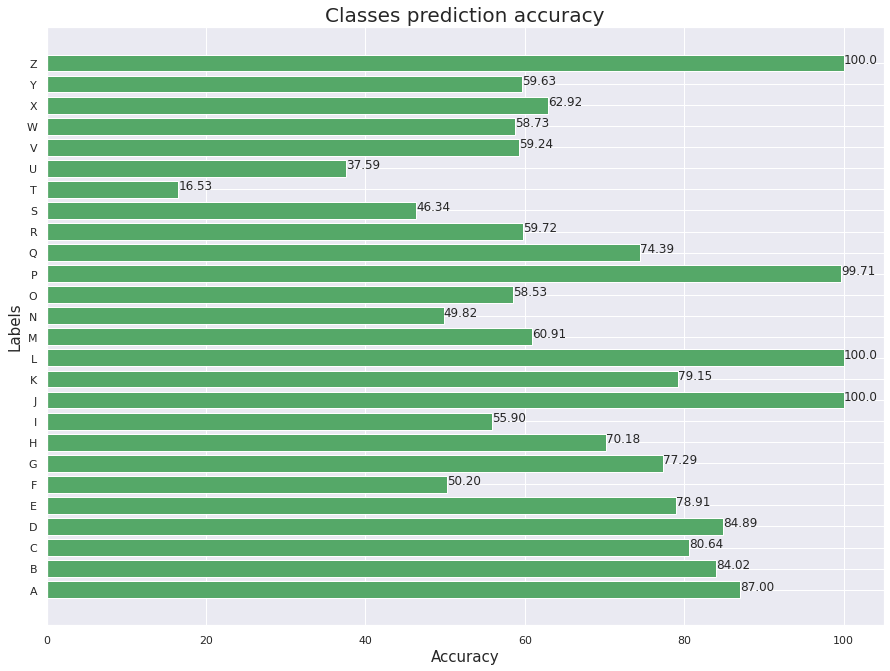

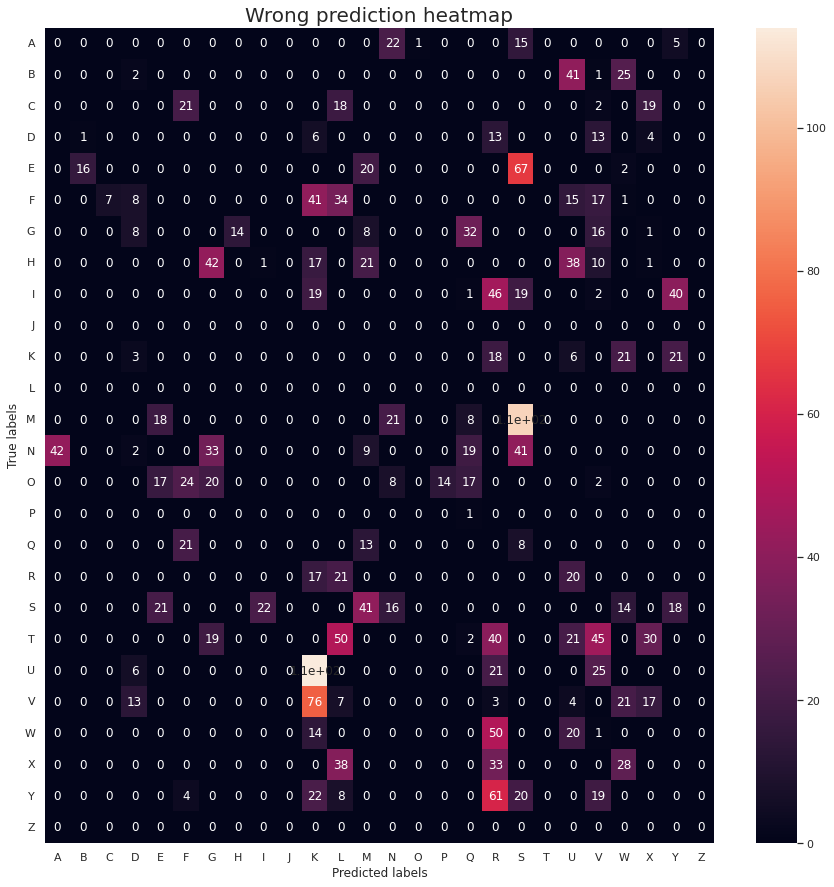

time: 2.52 s (started: 2022-10-15 02:56:01 +00:00)


In [ ]:
classAcc_Cal(X_pValue, y_test)

**Dicussion:**

These total connected layers are where the linear transformation of the input vector through a weight matrix is. These layers evaluate the probability relationship of the class and position of features on images (or the features) . The first experiment ran swiftly with 69.44% accuracy on the test when the accuracy on the test and validation was over 90%. This current design mostly struggles with recognising the class U. Only four classes got over 90% accuracy, and more than half the class got below 50\%. With this simple design, the model has learnt some features but not most of the dataset . The accuracy between testing and training has a big gap, which indicates the over-fitting of the training. It could be because of a characteristic of total connected layers where it learns every detail with every node connected with every previous layer's node and the next layer's node. Consequently, the model learnt but lost the elasticity to identify other cases.

# Optimisation

##Convolution layers added

In [ ]:
# Define the activation function to be used by hidden layers
actfn = "relu"
# actfn = "elu"
# Define the number and size of hidden layers
hiddensizes = [16, 32, 16]
# Optimiser and learning rate
optimizer = keras.optimizers.SGD
learningrate = 0.01  
# Set size of batch and number of epochs
batch_size = 32
n_epochs = 15

time: 862 µs (started: 2022-10-15 02:56:04 +00:00)


In [ ]:
gpus = tf.config.list_physical_devices('GPU')
if gpus:
  try:
    # Currently, memory growth needs to be the same across GPUs
    for gpu in gpus:
      tf.config.experimental.set_memory_growth(gpu, True)
    logical_gpus = tf.config.list_logical_devices('GPU')
    print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
  except RuntimeError as e:
    # Memory growth must be set before GPUs have been initialized
    print(e)

Physical devices cannot be modified after being initialized
time: 1.35 ms (started: 2022-10-15 02:56:04 +00:00)


In [ ]:
def model_cnn_factory(actfn, optimizer, learningrate):
    model = keras.models.Sequential()
    model.add(keras.layers.Conv2D(filters=32, kernel_size=3, strides=1, activation=actfn, padding="same", 
                                  input_shape=[28, 28, 1]))    # input layer goes into this 2D convolution
    model.add(keras.layers.MaxPooling2D(pool_size=2))          # Pool (downsize)
    for n in hiddensizes[1:-1]:
        model.add(keras.layers.Conv2D(filters=n, kernel_size=3, strides=1, padding="same", activation=actfn))  # 2nd Conv
        model.add(keras.layers.MaxPooling2D(pool_size=2))          # Pool (downsize)
    model.add(keras.layers.Conv2D(filters=hiddensizes[-1], kernel_size=3, strides=1, padding="same", activation=actfn))  # 2nd Conv
    model.add(keras.layers.Flatten())                          # unravel into a 1D vector
    for n in hiddensizes:
        model.add(keras.layers.Dense(n, activation = actfn))
    model.add(keras.layers.Dense(25, activation = "softmax"))  # always have 24 classes
    model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer(learning_rate=learningrate), metrics=["accuracy"])   
    return model

time: 2.14 ms (started: 2022-10-14 05:12:45 +00:00)


In [ ]:
def model_cnn_factory2(actfn, optimizer, learningrate):
    bias_initializer = tf.keras.initializers.HeNormal()
    model = keras.models.Sequential()
    model.add(keras.layers.Conv2D(filters=32, kernel_size=3, strides=1, activation=actfn, padding="same", 
                                  input_shape=[28, 28, 1]))    
    model.add(keras.layers.MaxPooling2D(pool_size=2))          
    
    for n in [512, 1024 ]:
      model.add(keras.layers.Conv2D(filters=n, kernel_size=3))  
    
    model.add(keras.layers.MaxPooling2D(pool_size=2))   
    model.add(keras.layers.Conv2D(filters=512, kernel_size=3,  activation=actfn)) 
    
    model.add(keras.layers.Flatten())             
    
    model.add(keras.layers.Dense(512, activation = actfn)) # use_bias = True, bias_initializer=bias_initializer
    model.add(keras.layers.Dense(25, activation = "softmax"))              
    model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer(learning_rate=learningrate), metrics=["accuracy"])   
    
    return model

time: 2.12 ms (started: 2022-10-14 04:42:28 +00:00)


In [ ]:
def model_cnn_factory3(actfn, optimizer, learningrate):
    bias_initializer = tf.keras.initializers.HeNormal()
    model = keras.models.Sequential()
    model.add(keras.layers.Conv2D(filters=512, kernel_size=3, strides=1, activation=actfn, padding="same", 
                                  input_shape=[28, 28, 1]))    
    model.add(keras.layers.MaxPooling2D(pool_size=2))          
    
    for n in range(0,3):
      model.add(keras.layers.Conv2D(filters=1024, kernel_size=3,activation=actfn,padding="same", ))  
    
    model.add(keras.layers.MaxPooling2D(pool_size=1))   
    
    model.add(keras.layers.Flatten())             
    
    model.add(keras.layers.Dense(1024, activation = actfn)) # use_bias = True, bias_initializer=bias_initializer
    model.add(keras.layers.Dense(25, activation = "softmax"))              
    model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer(learning_rate=learningrate), metrics=["accuracy"])   
    
    return model

time: 1.79 ms (started: 2022-10-14 04:42:28 +00:00)


In [ ]:
# Reshape the data to be shape [Nx, Ny, 1]
X_train = X_train.reshape((-1, 28, 28, 1))
X_val = X_val.reshape((-1, 28, 28, 1))
X_test = X_test.reshape((-1, 28, 28, 1))

time: 1.01 ms (started: 2022-10-15 02:56:04 +00:00)


In [ ]:
def plot_history(history):
    # Plot the results (shifting validation curves appropriately)
    plt.figure(figsize=(8,5))
    n = len(history.history['accuracy'])
    plt.plot(np.arange(0,n),history.history['accuracy'], color='orange')
    plt.plot(np.arange(0,n),history.history['loss'],'b')
    plt.plot(np.arange(0,n)+0.5,history.history['val_accuracy'],'r')  # offset both validation curves
    plt.plot(np.arange(0,n)+0.5,history.history['val_loss'],'g')
    plt.legend(['Train Acc','Train Loss','Val Acc','Val Loss'])
    plt.grid(True)
    plt.xlabel('Epoch')
    plt.ylabel('Score')
    plt.gca().set_ylim(0, 1) # set the vertical range to [0-1] 
    plt.show() 

time: 1.55 ms (started: 2022-10-15 02:56:04 +00:00)


In [ ]:
# Early stopping callback
early_stopping_cb = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True) 

# Do all functions
def do_all(model, n_epochs, batch_size, further_callbacks=[], showSummary = False):
  if further_callbacks != []:
    callbacks = further_callbacks
  else:
    callbacks = [early_stopping_cb]

  history = model.fit(X_train, y_train, epochs=n_epochs, callbacks = callbacks,
                      validation_data=(X_val, y_val))
  max_val_acc = np.max(history.history['val_accuracy'])

  if showSummary:
    model.summary()

  # Plot loss curve
  plot_history(history)

  # Loss and accuracy of test set
  testres = model.evaluate(X_test, y_test, verbose=0)
  print(f'Loss and accuracy of test set: {testres} \n')

  predict_x = model.predict(X_test)
  X_pValue = np.argmax(predict_x,axis=1)

  # Plot bar plot of each class accuracy + heatmap of error pairs
  classAcc_Cal(X_pValue, y_test)

  None
  # return (max_val_acc, history, model)

time: 1.59 ms (started: 2022-10-15 02:56:04 +00:00)


In [ ]:
model1 = model_cnn_factory( actfn, optimizer, learningrate)
model2 = model_cnn_factory2( actfn, optimizer, learningrate)
model3 = model_cnn_factory3( actfn, optimizer, learningrate)

time: 246 ms (started: 2022-10-14 04:46:18 +00:00)


###Model 1

Epoch 1/15
687/687 [==============================] - 3s 4ms/step - loss: 4.5273e-04 - accuracy: 1.0000 - val_loss: 0.0016 - val_accuracy: 0.9996
Epoch 2/15
687/687 [==============================] - 3s 4ms/step - loss: 4.2742e-04 - accuracy: 1.0000 - val_loss: 0.0017 - val_accuracy: 0.9995
Epoch 3/15
687/687 [==============================] - 3s 4ms/step - loss: 4.0899e-04 - accuracy: 1.0000 - val_loss: 0.0015 - val_accuracy: 0.9996
Epoch 4/15
687/687 [==============================] - 3s 4ms/step - loss: 3.9374e-04 - accuracy: 1.0000 - val_loss: 0.0017 - val_accuracy: 0.9996
Epoch 5/15
687/687 [==============================] - 3s 4ms/step - loss: 3.6853e-04 - accuracy: 1.0000 - val_loss: 0.0013 - val_accuracy: 0.9995
Epoch 6/15
687/687 [==============================] - 3s 4ms/step - loss: 3.5450e-04 - accuracy: 1.0000 - val_loss: 0.0015 - val_accuracy: 0.9996
Epoch 7/15
687/687 [==============================] - 3s 4ms/step - loss: 3.3741e-04 - accuracy: 1.0000 - val_loss: 0.0016 -

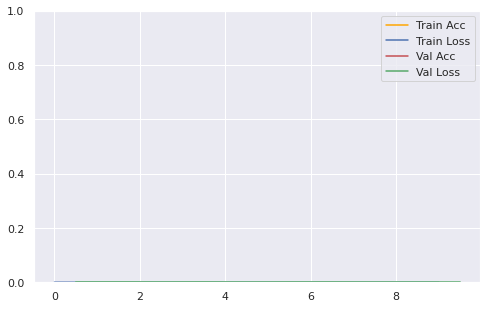

Loss and accuracy of test set: [1.255525827407837, 0.8248745203018188] 



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in true_divide


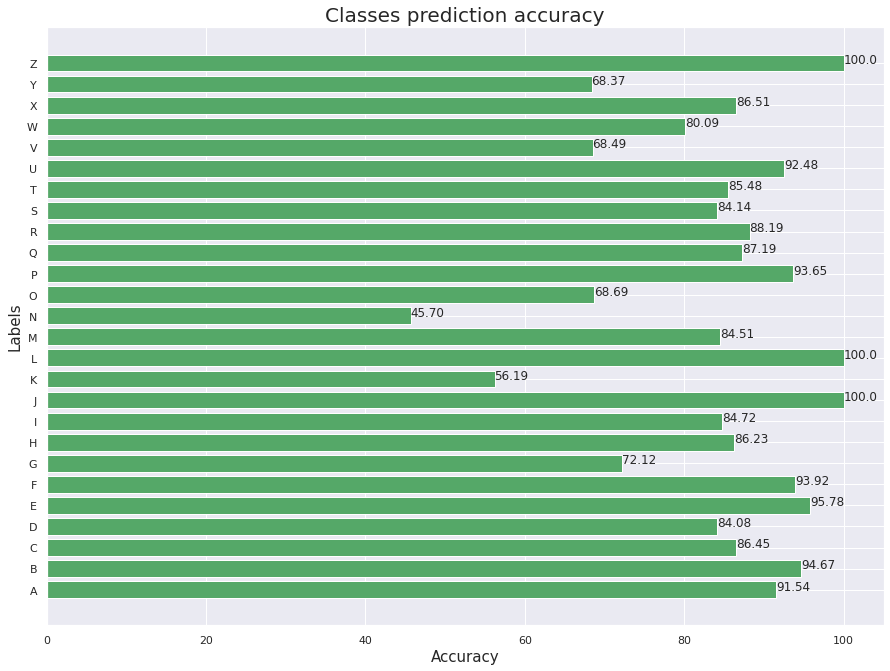

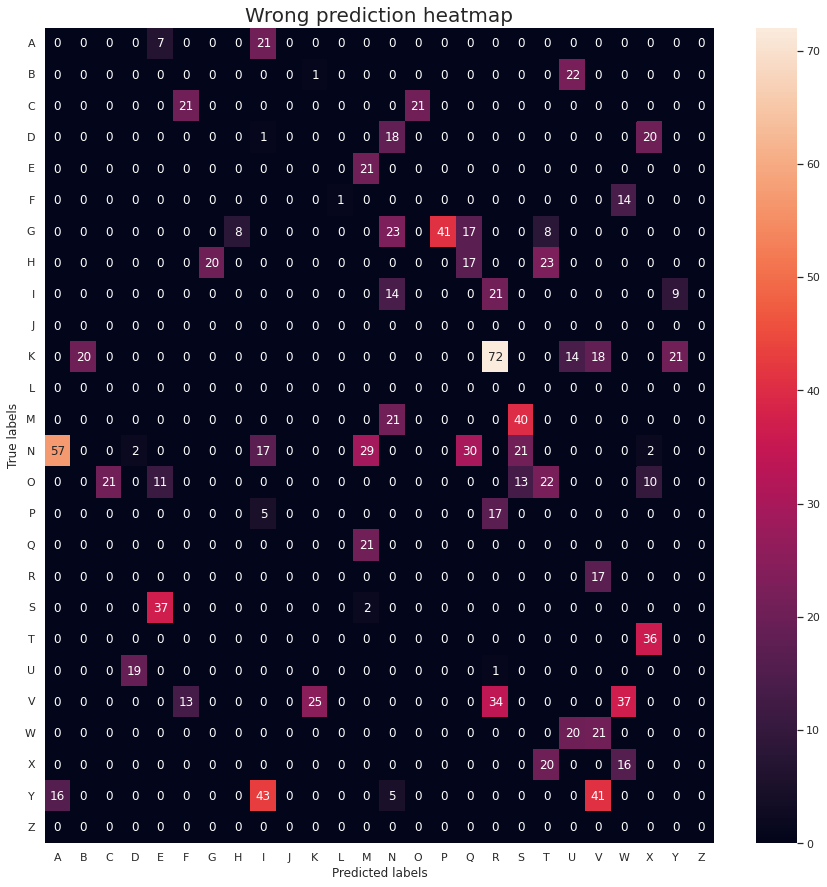

time: 44.6 s (started: 2022-10-12 10:16:27 +00:00)


In [ ]:
## Model 1
do_all(model1, n_epochs, batch_size)

### Model 2

Epoch 1/15
687/687 [==============================] - 19s 27ms/step - loss: 1.8088e-04 - accuracy: 1.0000 - val_loss: 2.4066e-04 - val_accuracy: 1.0000
Epoch 2/15
687/687 [==============================] - 19s 28ms/step - loss: 1.7344e-04 - accuracy: 1.0000 - val_loss: 2.3015e-04 - val_accuracy: 1.0000
Epoch 3/15
687/687 [==============================] - 19s 28ms/step - loss: 1.6639e-04 - accuracy: 1.0000 - val_loss: 2.2629e-04 - val_accuracy: 1.0000
Epoch 4/15
687/687 [==============================] - 19s 28ms/step - loss: 1.5948e-04 - accuracy: 1.0000 - val_loss: 2.2512e-04 - val_accuracy: 1.0000
Epoch 5/15
687/687 [==============================] - 19s 28ms/step - loss: 1.5478e-04 - accuracy: 1.0000 - val_loss: 2.0694e-04 - val_accuracy: 1.0000
Epoch 6/15
687/687 [==============================] - 19s 28ms/step - loss: 1.4902e-04 - accuracy: 1.0000 - val_loss: 2.0619e-04 - val_accuracy: 1.0000
Epoch 7/15
687/687 [==============================] - 19s 28ms/step - loss: 1.4388e-04 -

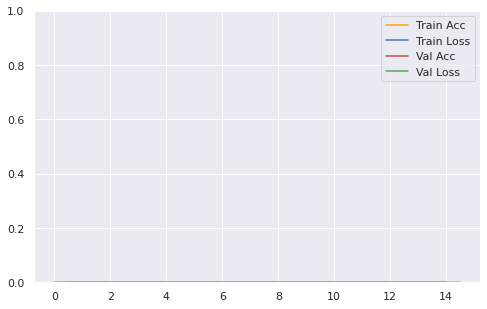

Loss and accuracy of test set: [0.6889221668243408, 0.8680981397628784] 



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in true_divide


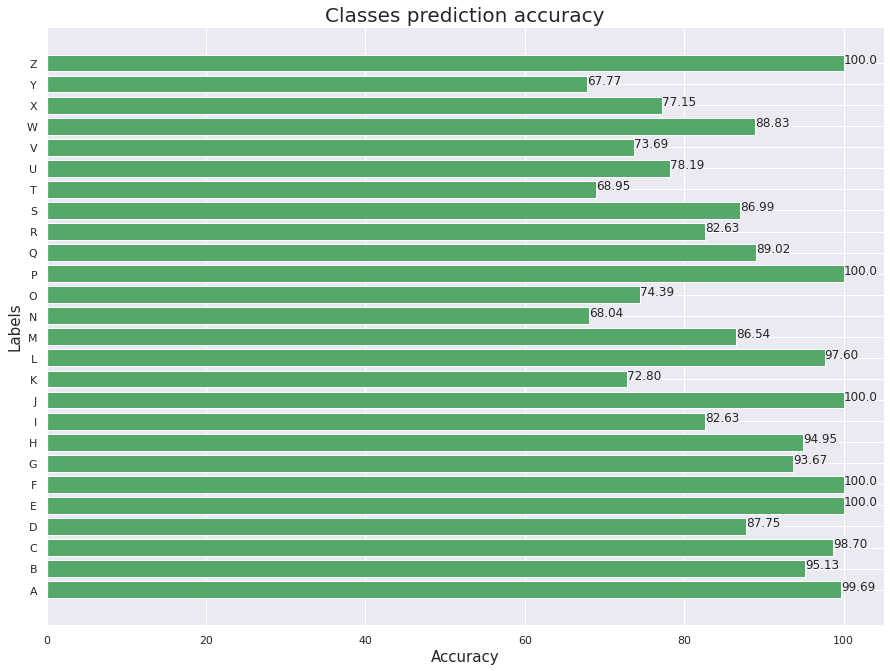

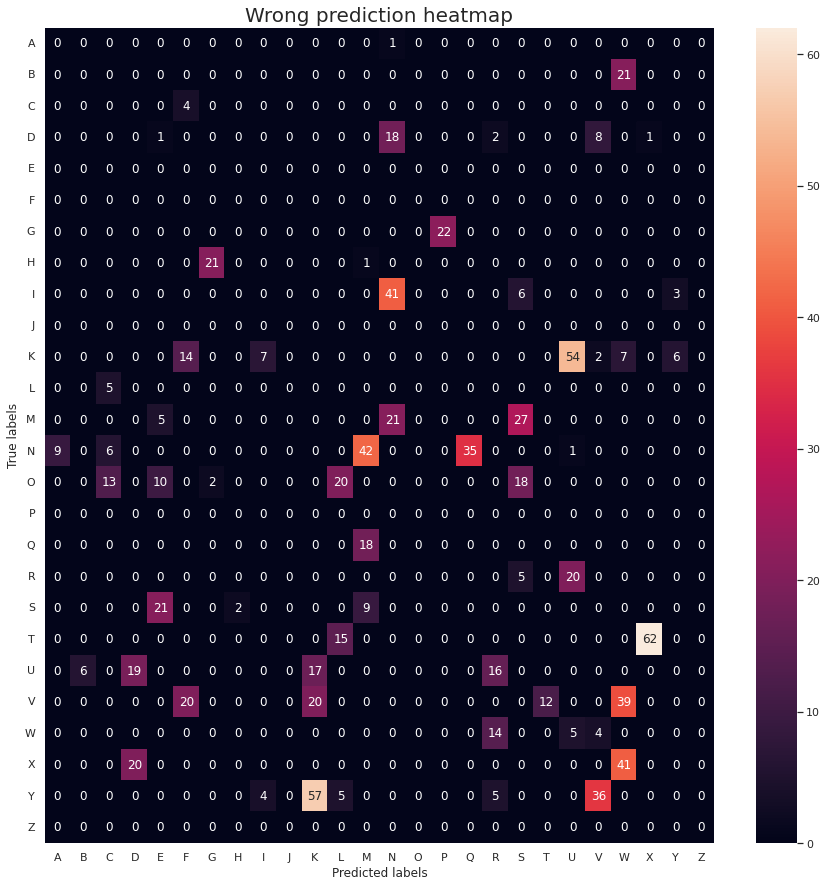

time: 4min 54s (started: 2022-10-12 10:17:23 +00:00)


In [ ]:
do_all(model2, n_epochs, batch_size)

### Model 3

Epoch 1/15
687/687 [==============================] - 100s 142ms/step - loss: 2.6594 - accuracy: 0.2118 - val_loss: 1.6806 - val_accuracy: 0.5440
Epoch 2/15
687/687 [==============================] - 95s 139ms/step - loss: 0.7693 - accuracy: 0.7584 - val_loss: 0.2933 - val_accuracy: 0.9106
Epoch 3/15
687/687 [==============================] - 96s 139ms/step - loss: 0.1627 - accuracy: 0.9516 - val_loss: 0.0496 - val_accuracy: 0.9887
Epoch 4/15
687/687 [==============================] - 95s 139ms/step - loss: 0.0240 - accuracy: 0.9951 - val_loss: 0.1599 - val_accuracy: 0.9587
Epoch 5/15
687/687 [==============================] - 96s 139ms/step - loss: 0.0247 - accuracy: 0.9963 - val_loss: 0.0026 - val_accuracy: 1.0000
Epoch 6/15
687/687 [==============================] - 96s 139ms/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 0.0014 - val_accuracy: 1.0000
Epoch 7/15
687/687 [==============================] - 96s 139ms/step - loss: 9.1899e-04 - accuracy: 1.0000 - val_loss: 8.1483e-04

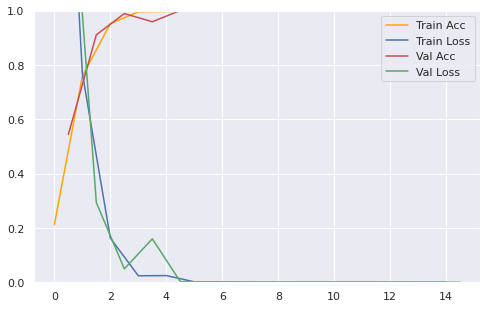

Loss and accuracy of test set: [0.818370521068573, 0.856943666934967] 



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in true_divide


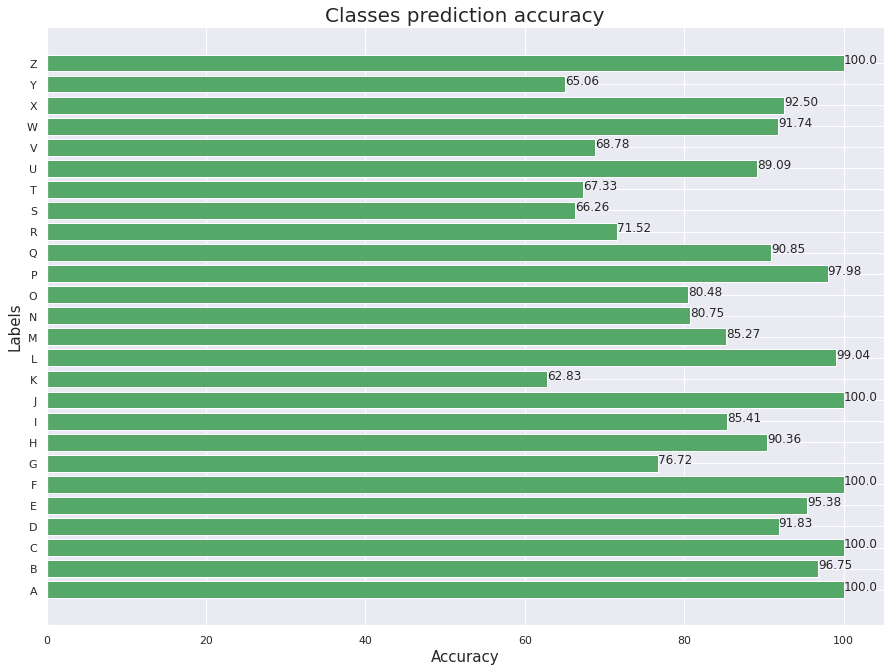

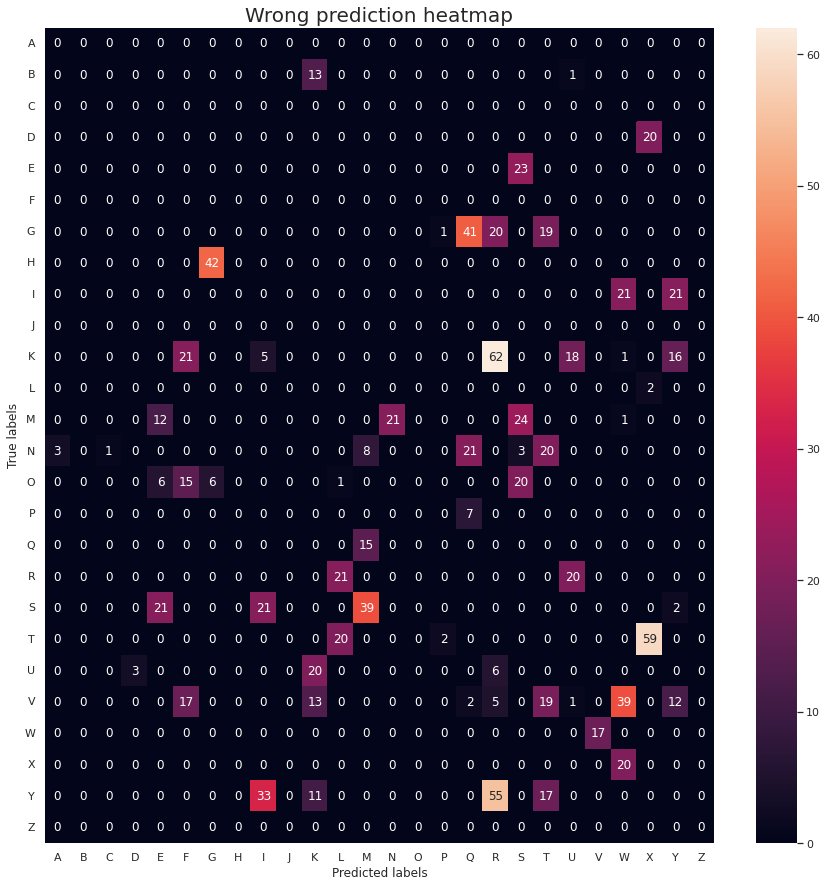

time: 24min 18s (started: 2022-10-12 10:22:18 +00:00)


In [ ]:
do_all(model3, n_epochs, batch_size)

### Model 4

Epoch 1/15
687/687 [==============================] - 69s 97ms/step - loss: 2.8486 - accuracy: 0.1472 - val_loss: 1.7582 - val_accuracy: 0.4147
Epoch 2/15
687/687 [==============================] - 65s 95ms/step - loss: 0.7086 - accuracy: 0.7677 - val_loss: 0.4467 - val_accuracy: 0.8953
Epoch 3/15
687/687 [==============================] - 65s 95ms/step - loss: 0.1129 - accuracy: 0.9698 - val_loss: 0.5170 - val_accuracy: 0.8907
Epoch 4/15
687/687 [==============================] - 65s 95ms/step - loss: 0.0176 - accuracy: 0.9969 - val_loss: 1.1830 - val_accuracy: 0.8275
Epoch 5/15
687/687 [==============================] - 65s 95ms/step - loss: 0.0119 - accuracy: 0.9973 - val_loss: 0.0016 - val_accuracy: 1.0000
Epoch 6/15
687/687 [==============================] - 65s 95ms/step - loss: 9.0605e-04 - accuracy: 1.0000 - val_loss: 7.9520e-04 - val_accuracy: 1.0000
Epoch 7/15
687/687 [==============================] - 65s 95ms/step - loss: 5.6090e-04 - accuracy: 1.0000 - val_loss: 5.6396e-04

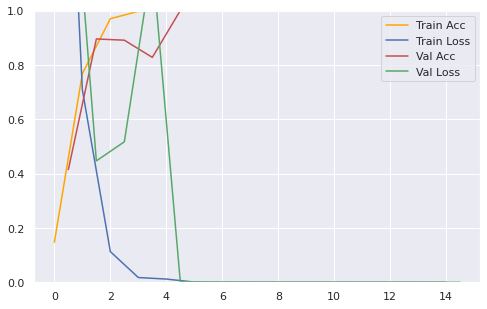

Loss and accuracy of test set: [0.6567031741142273, 0.862939178943634] 



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in true_divide


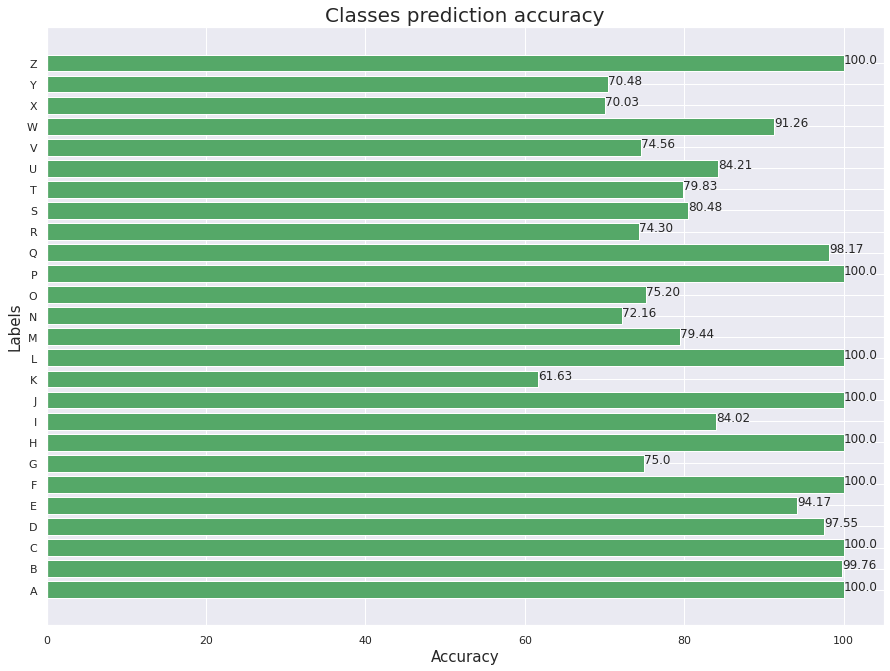

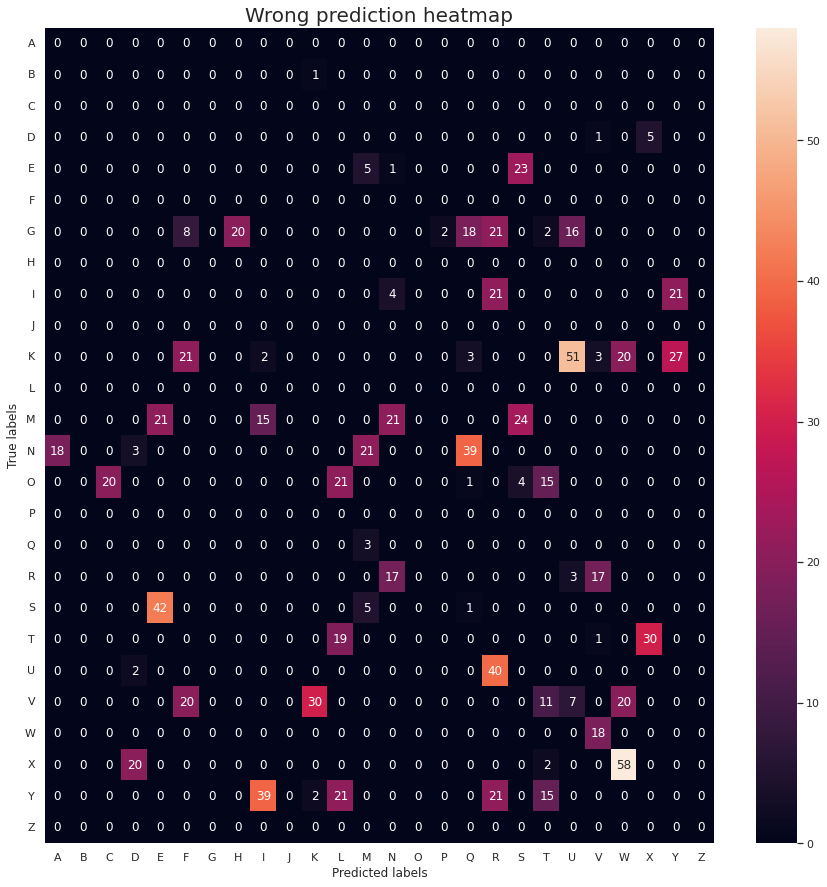

time: 16min 37s (started: 2022-10-12 10:46:37 +00:00)


In [ ]:
def model_cnn_factory4(actfn, optimizer, learningrate):
    bias_initializer = tf.keras.initializers.HeNormal()
    model = keras.models.Sequential()
    model.add(keras.layers.Conv2D(filters=512, kernel_size=7, strides=1, activation=actfn, padding="same", 
                                  input_shape=[28, 28, 1]))   
    model.add(keras.layers.MaxPooling2D(pool_size=2))          
    model.add(keras.layers.Conv2D(filters=512, kernel_size=5,  activation=actfn, padding="same"))  
    model.add(keras.layers.MaxPooling2D(pool_size=2))  

  
    model.add(keras.layers.Conv2D(filters=512, kernel_size=3, strides=1, padding="same"))  
    model.add(keras.layers.Conv2D(filters=512, kernel_size=5, padding="same"))  
    model.add(keras.layers.Conv2D(filters=512, kernel_size=5,  activation=actfn, padding="same"))  

    model.add(keras.layers.MaxPooling2D(pool_size=1))   
    model.add(keras.layers.Conv2D(filters=1024, kernel_size=5,  activation=actfn)) 
    
    model.add(keras.layers.Flatten())             
    
    model.add(keras.layers.Dense(512, activation = actfn)) # use_bias = True, bias_initializer=bias_initializer
    model.add(keras.layers.Dense(25, activation = "softmax"))              
    model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer(learning_rate=learningrate), metrics=["accuracy"])   
    
    return model

do_all(model_cnn_factory4( actfn, optimizer, learningrate), n_epochs, batch_size)

##Batch normalisation added 

### Model 5

Epoch 1/15
687/687 [==============================] - 47s 66ms/step - loss: 0.5499 - accuracy: 0.8811 - val_loss: 0.0146 - val_accuracy: 0.9987
Epoch 2/15
687/687 [==============================] - 43s 63ms/step - loss: 0.0033 - accuracy: 1.0000 - val_loss: 9.6998e-04 - val_accuracy: 1.0000
Epoch 3/15
687/687 [==============================] - 43s 63ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 4.9642e-04 - val_accuracy: 1.0000
Epoch 4/15
687/687 [==============================] - 43s 63ms/step - loss: 8.8797e-04 - accuracy: 1.0000 - val_loss: 3.2571e-04 - val_accuracy: 1.0000
Epoch 5/15
687/687 [==============================] - 43s 63ms/step - loss: 6.2814e-04 - accuracy: 1.0000 - val_loss: 2.1356e-04 - val_accuracy: 1.0000
Epoch 6/15
687/687 [==============================] - 43s 63ms/step - loss: 5.0377e-04 - accuracy: 1.0000 - val_loss: 2.4086e-04 - val_accuracy: 1.0000
Epoch 7/15
687/687 [==============================] - 43s 63ms/step - loss: 4.3320e-04 - accuracy: 1.000

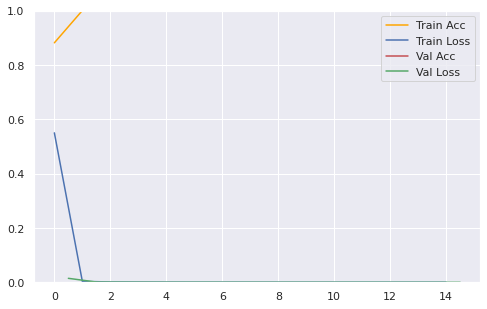

Loss and accuracy of test set: [0.1930934637784958, 0.944366991519928] 



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in true_divide


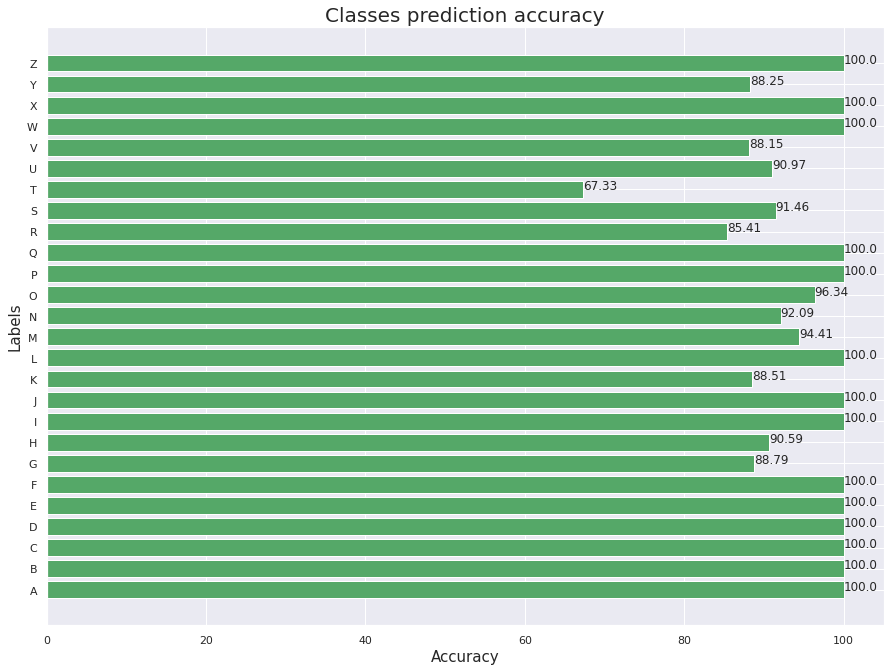

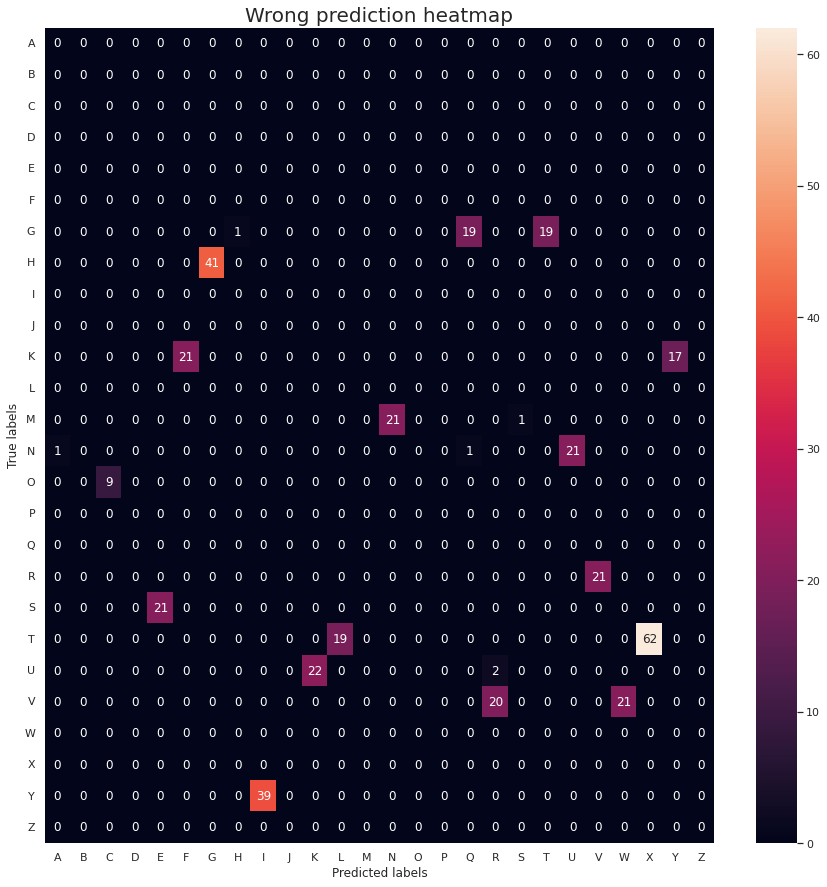

time: 11min (started: 2022-10-12 11:03:14 +00:00)


In [ ]:
## Model 5
def model_cnn_factory6(actfn, optimizer, learningrate):

  model = keras.models.Sequential()
  model.add(keras.layers.Conv2D(filters=512, kernel_size=7, strides=1, activation=actfn, padding="same", 
                                input_shape=[28, 28, 1]))   
  model.add(keras.layers.MaxPooling2D(pool_size=2))      
  model.add(keras.layers.BatchNormalization())   
      
  model.add(keras.layers.Conv2D(filters=512, kernel_size=5,  activation=actfn, padding="same"))  
  model.add(keras.layers.MaxPooling2D(pool_size=2))  
  model.add(keras.layers.BatchNormalization())   

  model.add(keras.layers.Conv2D(filters=512, kernel_size=3, strides=1, padding="same"))  
  model.add(keras.layers.Conv2D(filters=512, kernel_size=3, strides=2, padding="same"))  

  model.add(keras.layers.Conv2D(filters=512, kernel_size=5, padding="same"))  
  model.add(keras.layers.Conv2D(filters=512, kernel_size=3,  activation=actfn, padding="same"))  

  model.add(keras.layers.MaxPooling2D(pool_size=1))   
  model.add(keras.layers.Conv2D(filters=1024, kernel_size=3,  activation=actfn)) 
  
  model.add(keras.layers.Flatten())             
  model.add(keras.layers.BatchNormalization())   
  model.add(keras.layers.Dense(1024))
  model.add(keras.layers.Dense(25, activation = "softmax"))   

  model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer(learning_rate=learningrate), metrics=["accuracy"])   
    
  return model

do_all(model_cnn_factory6( actfn, optimizer, learningrate), n_epochs, batch_size)

### Model 6

Epoch 1/15
687/687 [==============================] - 65s 93ms/step - loss: 0.6356 - accuracy: 0.8707 - val_loss: 0.0141 - val_accuracy: 0.9984
Epoch 2/15
687/687 [==============================] - 63s 92ms/step - loss: 0.0056 - accuracy: 0.9994 - val_loss: 8.9817e-04 - val_accuracy: 1.0000
Epoch 3/15
687/687 [==============================] - 63s 92ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 4.4879e-04 - val_accuracy: 1.0000
Epoch 4/15
687/687 [==============================] - 64s 93ms/step - loss: 8.2058e-04 - accuracy: 1.0000 - val_loss: 3.2659e-04 - val_accuracy: 1.0000
Epoch 5/15
687/687 [==============================] - 64s 92ms/step - loss: 6.5736e-04 - accuracy: 1.0000 - val_loss: 2.2410e-04 - val_accuracy: 1.0000
Epoch 6/15
687/687 [==============================] - 63s 92ms/step - loss: 4.7369e-04 - accuracy: 1.0000 - val_loss: 3.8056e-04 - val_accuracy: 1.0000
Epoch 7/15
687/687 [==============================] - 63s 92ms/step - loss: 4.8557e-04 - accuracy: 1.000

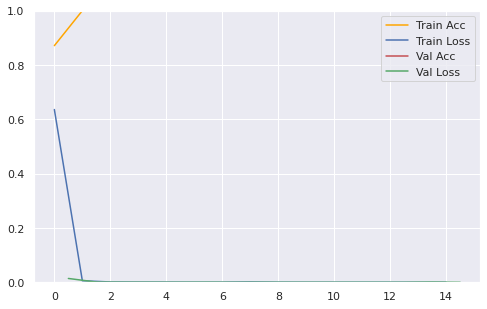

Loss and accuracy of test set: [0.1633874922990799, 0.9432515501976013] 



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in true_divide


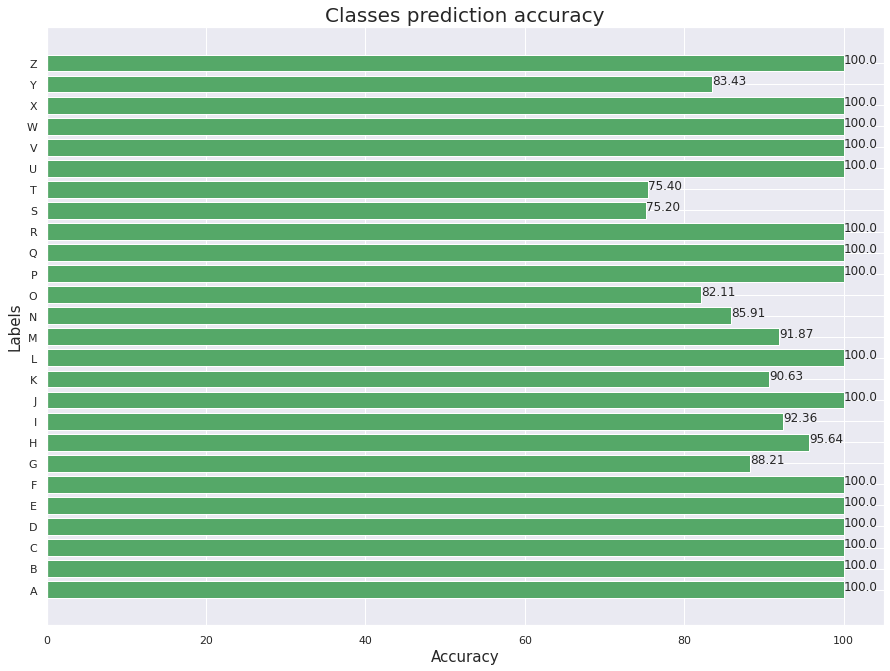

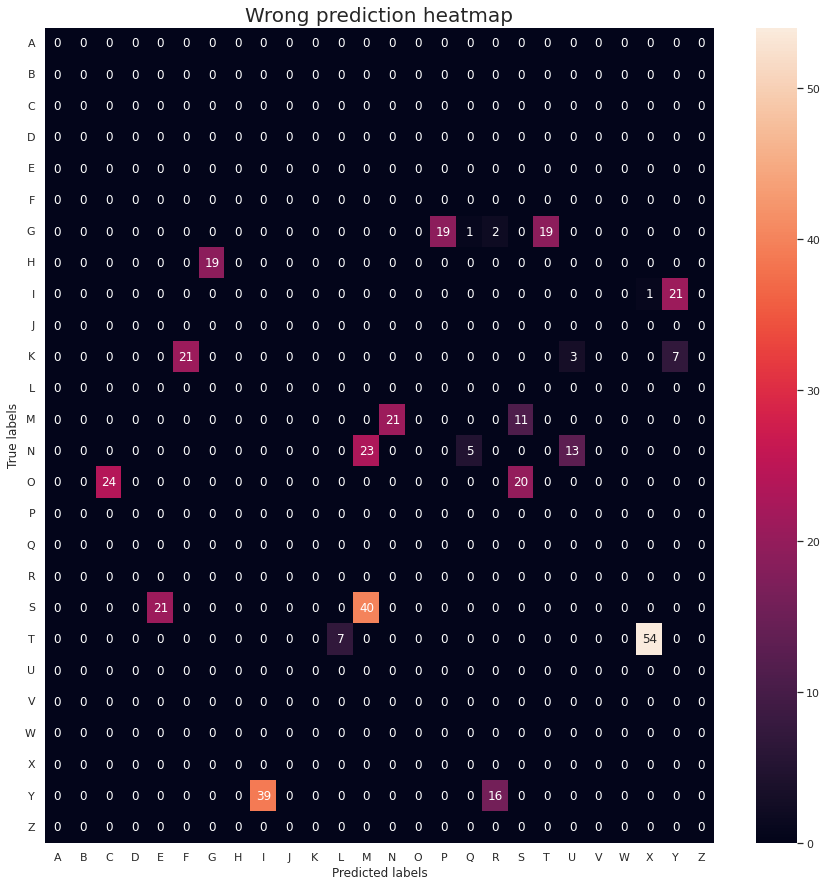

time: 16min 36s (started: 2022-10-12 11:14:15 +00:00)


In [ ]:
## Model 6
def model_cnn_factory7(actfn, optimizer, learningrate):

  model = keras.models.Sequential()
  model.add(keras.layers.Conv2D(filters=512, kernel_size=7, strides=1, activation=actfn, padding="same", 
                                input_shape=[28, 28, 1]))   
  model.add(keras.layers.MaxPooling2D(pool_size= 2))      
  model.add(keras.layers.BatchNormalization())   
      
  model.add(keras.layers.Conv2D(filters=512, kernel_size=5,  activation=actfn, padding="same"))  
  model.add(keras.layers.Conv2D(filters=512, kernel_size=5, padding="same"))  
  model.add(keras.layers.MaxPooling2D(pool_size= 2))     
  model.add(keras.layers.BatchNormalization())   

  model.add(keras.layers.Conv2D(filters=512, kernel_size=3, strides=1, padding="same"))  
  model.add(keras.layers.Conv2D(filters=512, kernel_size=3, strides=2, padding="same"))  

  model.add(keras.layers.Conv2D(filters=512, kernel_size=5, padding="same"))  
  model.add(keras.layers.Conv2D(filters=512, kernel_size=5,  activation=actfn, padding="same"))  

  model.add(keras.layers.MaxPooling2D(pool_size= 1))
  model.add(keras.layers.BatchNormalization())       
  model.add(keras.layers.Conv2D(filters=1024, kernel_size=3,  activation=actfn)) 
  
  model.add(keras.layers.Flatten()) 
  model.add(keras.layers.BatchNormalization())                  
  model.add(keras.layers.Dense(1024))
  model.add(keras.layers.Dense(25, activation = "softmax"))   

  model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer(learning_rate=learningrate), metrics=["accuracy"])   
    
  return model

do_all(model_cnn_factory7( actfn, optimizer, learningrate), n_epochs, batch_size)

### Model 7

Epoch 1/15
687/687 [==============================] - 65s 92ms/step - loss: 0.2161 - accuracy: 0.9415 - val_loss: 0.0046 - val_accuracy: 1.0000
Epoch 2/15
687/687 [==============================] - 63s 91ms/step - loss: 0.0020 - accuracy: 1.0000 - val_loss: 6.2949e-04 - val_accuracy: 1.0000
Epoch 3/15
687/687 [==============================] - 63s 91ms/step - loss: 0.0010 - accuracy: 1.0000 - val_loss: 3.8466e-04 - val_accuracy: 1.0000
Epoch 4/15
687/687 [==============================] - 63s 91ms/step - loss: 7.3112e-04 - accuracy: 1.0000 - val_loss: 2.6613e-04 - val_accuracy: 1.0000
Epoch 5/15
687/687 [==============================] - 63s 91ms/step - loss: 5.4804e-04 - accuracy: 1.0000 - val_loss: 2.0725e-04 - val_accuracy: 1.0000
Epoch 6/15
687/687 [==============================] - 63s 91ms/step - loss: 4.3176e-04 - accuracy: 1.0000 - val_loss: 1.6825e-04 - val_accuracy: 1.0000
Epoch 7/15
687/687 [==============================] - 63s 91ms/step - loss: 3.6259e-04 - accuracy: 1.000

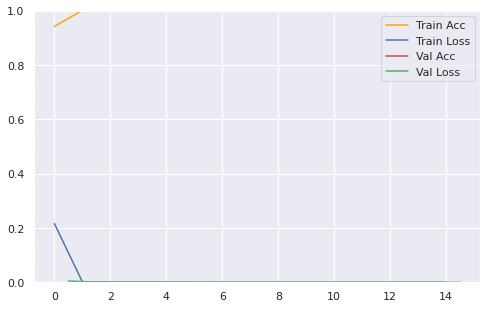

Loss and accuracy of test set: [0.13098645210266113, 0.9574735164642334] 



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in true_divide


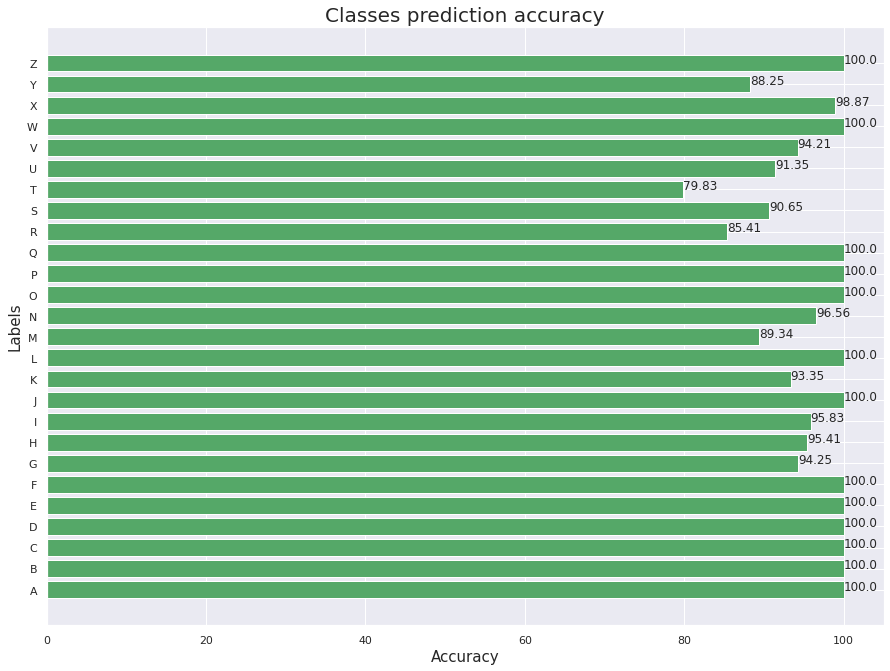

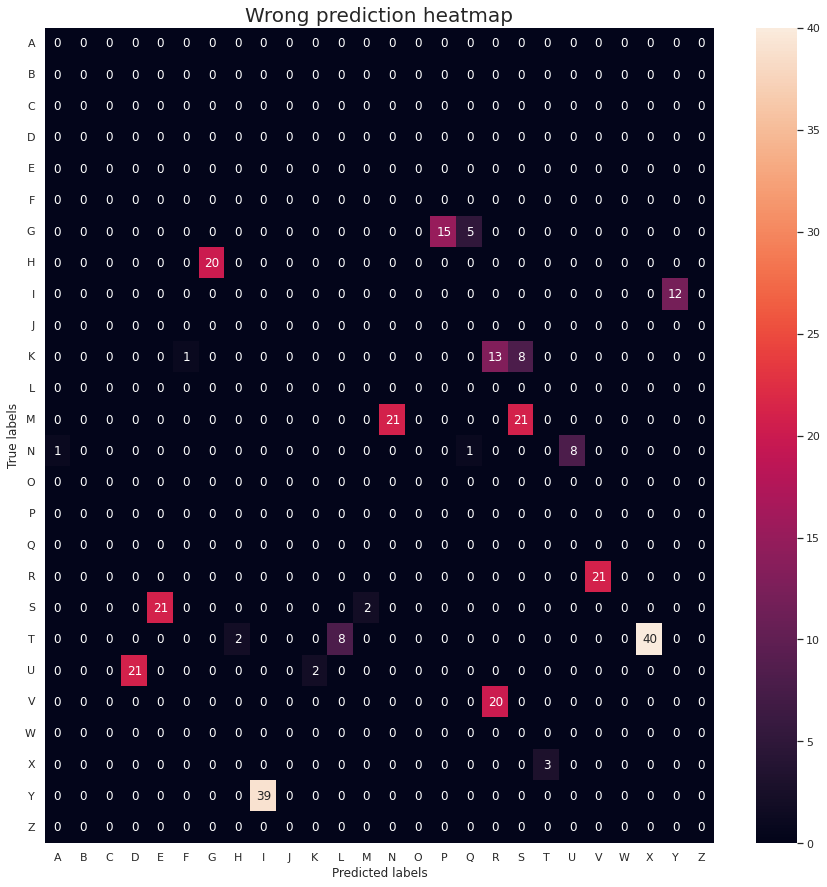

time: 16min 36s (started: 2022-10-12 11:30:51 +00:00)


In [ ]:
## Model 7
def model_cnn_factory8(actfn, optimizer, learningrate):

  model = keras.models.Sequential()
  model.add(keras.layers.BatchNormalization())
  model.add(keras.layers.Conv2D(filters=512, kernel_size=7, strides=1, activation=actfn, padding="same", 
                                input_shape=[28, 28, 1]))   
  model.add(keras.layers.MaxPooling2D(pool_size= 2))      
  model.add(keras.layers.BatchNormalization())   
      
  model.add(keras.layers.Conv2D(filters=512, kernel_size=5,  activation=actfn, padding="same"))  
  model.add(keras.layers.Conv2D(filters=512, kernel_size=5, padding="same"))  
  model.add(keras.layers.MaxPooling2D(pool_size= 2))     
  model.add(keras.layers.BatchNormalization())   

  model.add(keras.layers.Conv2D(filters=512, kernel_size=3, strides=1, padding="same"))  
  model.add(keras.layers.Conv2D(filters=512, kernel_size=3, strides=2, padding="same"))  

  model.add(keras.layers.Conv2D(filters=512, kernel_size=5, padding="same"))  
  model.add(keras.layers.Conv2D(filters=512, kernel_size=5,  activation=actfn, padding="same"))  

  model.add(keras.layers.MaxPooling2D(pool_size= 1))
  model.add(keras.layers.BatchNormalization())       
  model.add(keras.layers.Conv2D(filters=512, kernel_size=3, activation=actfn)) 
  
  model.add(keras.layers.Flatten()) 
  model.add(keras.layers.BatchNormalization())

  model.add(keras.layers.Dense(512))                  
  model.add(keras.layers.Dense(1024, activation=actfn))
  model.add(keras.layers.Dense(25, activation = "softmax"))   

  model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer(learning_rate=learningrate), metrics=["accuracy"])   
    
  return model

do_all(model_cnn_factory8( actfn, optimizer, learningrate), n_epochs, batch_size)

## Manual tuning

In [ ]:
!pip install mlxtend --upgrade --no-deps

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.3 MB 4.1 MB/s 
  Attempting uninstall: mlxtend
    Found existing installation: mlxtend 0.14.0
    Uninstalling mlxtend-0.14.0:
      Successfully uninstalled mlxtend-0.14.0
time: 2.06 s (started: 2022-10-15 02:57:33 +00:00)


In [ ]:
!pip install keras-flops

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
time: 3.96 s (started: 2022-10-15 02:57:35 +00:00)


In [ ]:
#The code from https://cloudstor.aarnet.edu.au/plus/s/PcSc67ZncTSQP0E can be used to count flops
#Download the code.
!wget -c https://cloudstor.aarnet.edu.au/plus/s/hXo1dK9SZqiEVn9/download
!mv download FLOPs_counter.py
#!rm -rf download
from keras_flops import get_flops

--2022-10-15 02:57:39--  https://cloudstor.aarnet.edu.au/plus/s/hXo1dK9SZqiEVn9/download
Resolving cloudstor.aarnet.edu.au (cloudstor.aarnet.edu.au)... 202.158.207.20
Connecting to cloudstor.aarnet.edu.au (cloudstor.aarnet.edu.au)|202.158.207.20|:443... connected.
HTTP request sent, awaiting response... 200 OK
Syntax error in Set-Cookie: 5230042dc1897=r96g4i81q6irev87dtns5cncob; path=/plus;; Secure at position 53.
Syntax error in Set-Cookie: oc_sessionPassphrase=ni3OQy%2FOhq0UsyZhC5%2FnNsFj96p3Umh12L7DoEHGujlYl78C18W9Xihp1%2FITNlL%2Bks0eUhMdL6GK5o2Cap8vZHe%2FYHAK4t7FejBY8W8fpbzDenw54pqMGI5BUsw%2FpY6o; expires=Sun, 16-Oct-2022 02:57:39 GMT; Max-Age=86400; path=/plus;; Secure at position 228.
Length: 5201 (5.1K) [text/x-python]
Saving to: ‘download’

download            100%[===================>]   5.08K  --.-KB/s    in 0s      

2022-10-15 02:57:40 (490 MB/s) - ‘download’ saved [5201/5201]

time: 1.3 s (started: 2022-10-15 02:57:39 +00:00)


**Dicussion:**

FLOPs are added to track the floating point operation of the computing entity. Besides the accuracy objective, the cost of computing should also be considered. It will be one more criterion for fiving the chosen model parameter.

In [ ]:
### List of model parameters
lr = [0.1, 0.01, 0.001, 0.0001, 0.00001]
batchSize = [16, 32, 64, 128]
lFunct = ['poisson','sparse_categorical_crossentropy']
optList = [keras.optimizers.SGD, keras.optimizers.Adam ]

time: 967 µs (started: 2022-10-15 02:57:42 +00:00)


In [ ]:
def chosenModel(actfn, optimizer, learningrate, lossOpt="sparse_categorical_crossentropy"):

  model = keras.models.Sequential()
  model.add(keras.layers.BatchNormalization())
  model.add(keras.layers.Conv2D(filters=512, kernel_size=7, strides=1, activation=actfn, padding="same", 
                                input_shape=[28, 28, 1]))   
  model.add(keras.layers.MaxPooling2D(pool_size= 2))      
  model.add(keras.layers.BatchNormalization())   
      
  model.add(keras.layers.Conv2D(filters=512, kernel_size=5,  activation=actfn, padding="same"))  
  model.add(keras.layers.Conv2D(filters=512, kernel_size=5, padding="same"))  
  model.add(keras.layers.MaxPooling2D(pool_size= 2))     
  model.add(keras.layers.BatchNormalization())   

  model.add(keras.layers.Conv2D(filters=512, kernel_size=3, strides=1, padding="same"))  
  model.add(keras.layers.Conv2D(filters=512, kernel_size=3, strides=2, padding="same"))  

  model.add(keras.layers.Conv2D(filters=512, kernel_size=5, padding="same"))  
  model.add(keras.layers.Conv2D(filters=512, kernel_size=5,  activation=actfn, padding="same"))  

  model.add(keras.layers.MaxPooling2D(pool_size= 1))
  model.add(keras.layers.BatchNormalization())       
  model.add(keras.layers.Conv2D(filters=512, kernel_size=3, activation=actfn)) 
  
  model.add(keras.layers.Flatten()) 
  model.add(keras.layers.BatchNormalization())

  model.add(keras.layers.Dense(512))                  
  model.add(keras.layers.Dense(1024, activation=actfn))
  model.add(keras.layers.Dense(25, activation = "softmax"))   

  model.compile(loss = lossOpt, optimizer = optimizer(learning_rate=learningrate), metrics=["accuracy"])   
    
  return model

time: 5.73 ms (started: 2022-10-15 02:57:50 +00:00)


In [ ]:
def evaluateModel(model, n_epochs, batch_size, further_callbacks=[], showSummary = False):
  
  if further_callbacks != []:
    callbacks = further_callbacks
  else:
    callbacks = [early_stopping_cb]

  history = model.fit(X_train, y_train, epochs=n_epochs, callbacks = callbacks,
                      validation_data=(X_val, y_val), verbose=0)
  max_val_acc = np.max(history.history['val_accuracy'])

  if showSummary:
    model.summary()

  # FLOPS reports
  flops = get_flops(model, batch_size)
  print(f">>>>>FLOPS: {flops / 10 ** 9:.03} G")

  # Loss and accuracy of test set
  testres = model.evaluate(X_test, y_test, verbose=0)
  print(f'>>>>>Loss and accuracy of test set: {testres} \n')

  # Plot loss curve
  plot_history(history)

  predict_x = model.predict(X_test)
  X_pValue = np.argmax(predict_x,axis=1)

  # Plot bar plot of each class accuracy + heatmap of error pairs
  classAcc_Cal(X_pValue, y_test)

  None
  return (testres, model)

time: 3.3 ms (started: 2022-10-15 02:57:51 +00:00)


### Learning rate tunning

LEARNING RATE: 0.1



Instructions for updating:
Use `tf.compat.v1.graph_util.tensor_shape_from_node_def_name`


>>>>>FLOPS: 1.9e+02 G
>>>>>Loss and accuracy of test set: [nan, 0.04615170136094093] 



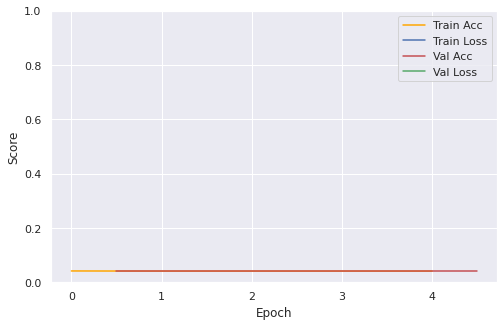

225/225 [==============================] - 5s 20ms/step


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in true_divide


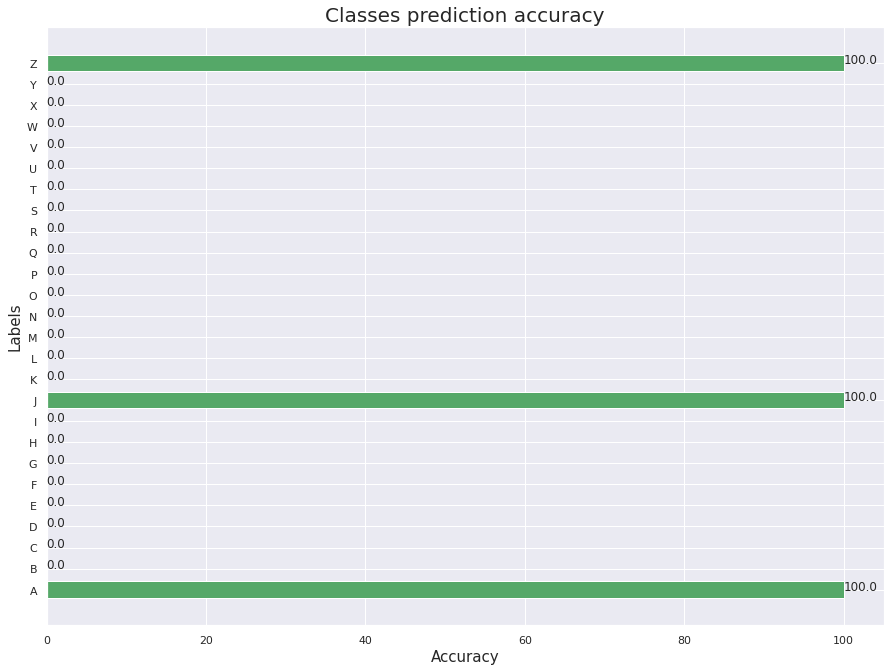

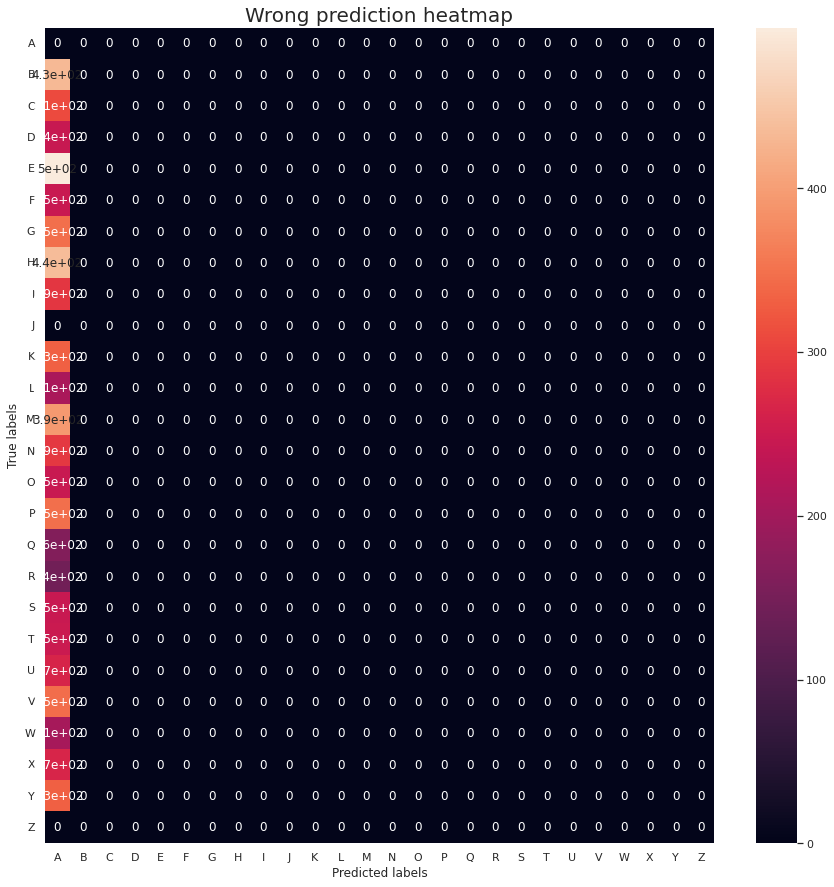

LEARNING RATE: 0.01



>>>>>FLOPS: 1.9e+02 G
>>>>>Loss and accuracy of test set: [0.1398380547761917, 0.9558003544807434] 



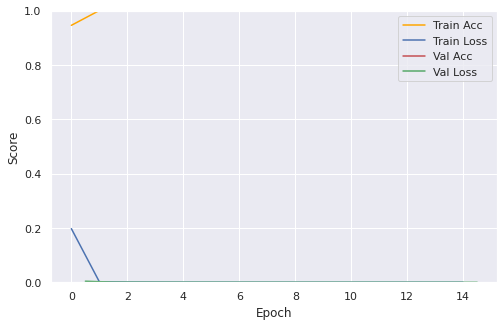

225/225 [==============================] - 5s 23ms/step


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in true_divide


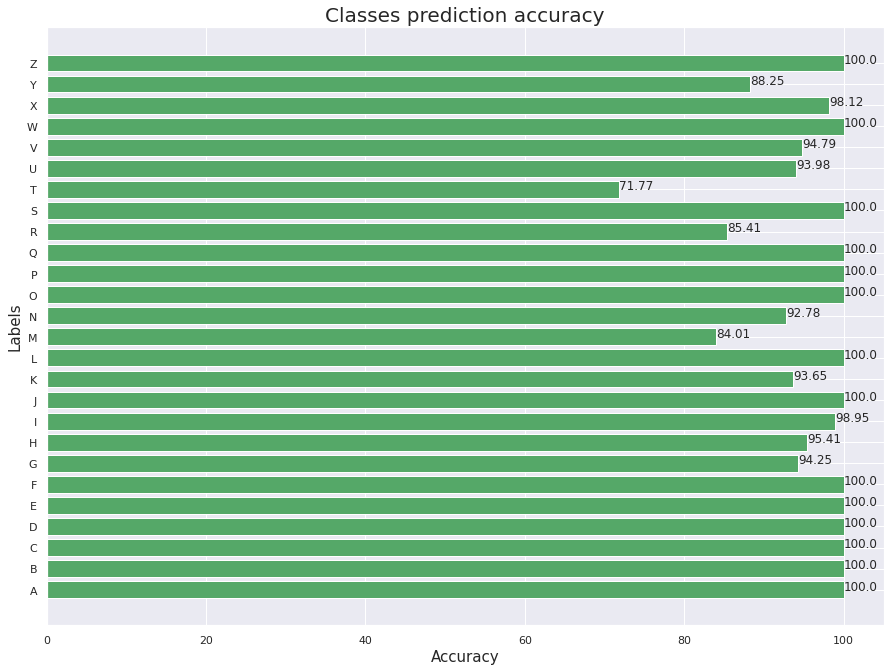

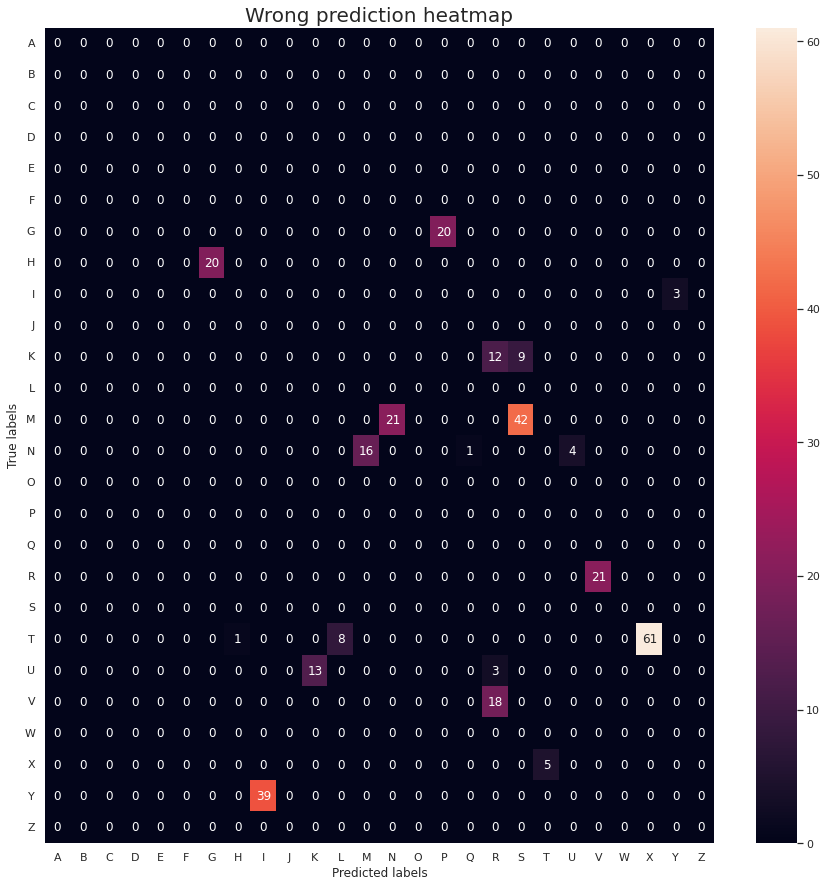

LEARNING RATE: 0.001



>>>>>FLOPS: 1.9e+02 G
>>>>>Loss and accuracy of test set: [0.2093685418367386, 0.9411600828170776] 



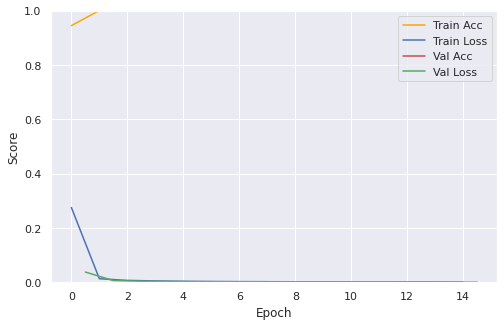

225/225 [==============================] - 5s 23ms/step


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in true_divide


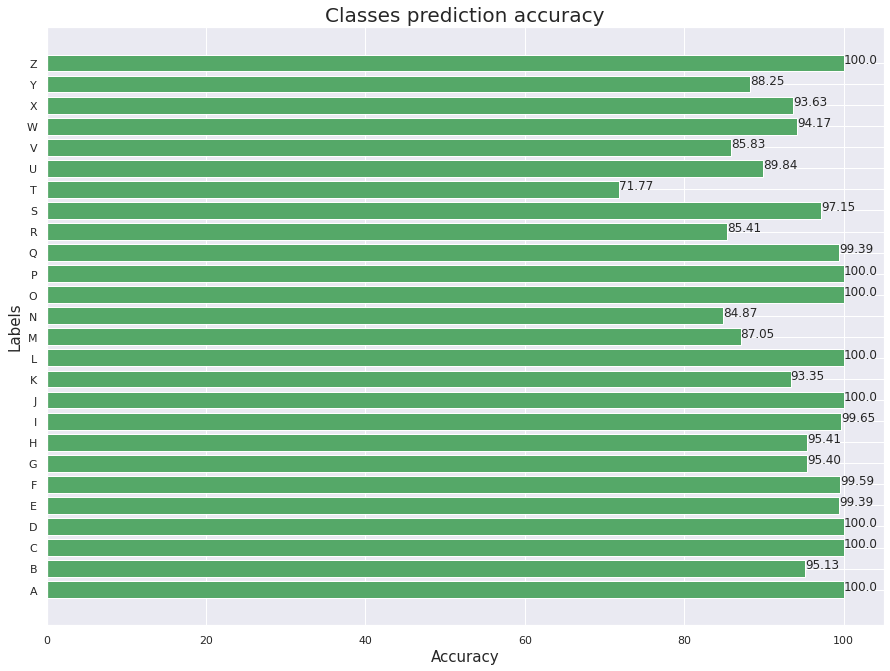

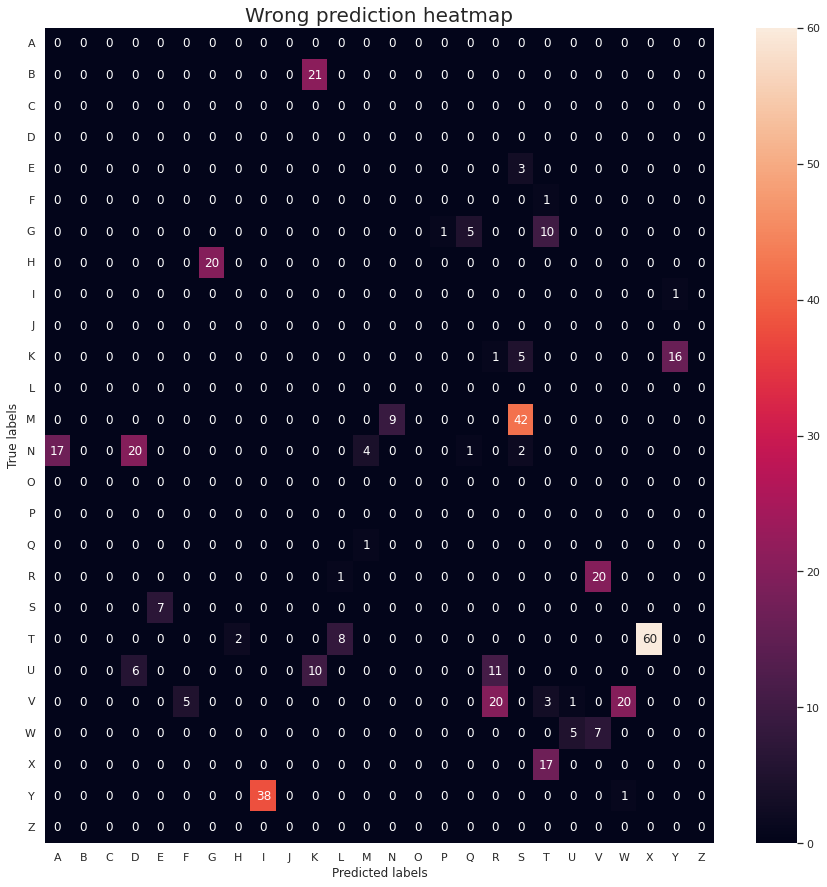

LEARNING RATE: 0.0001



>>>>>FLOPS: 1.9e+02 G
>>>>>Loss and accuracy of test set: [0.3686806857585907, 0.8912436962127686] 



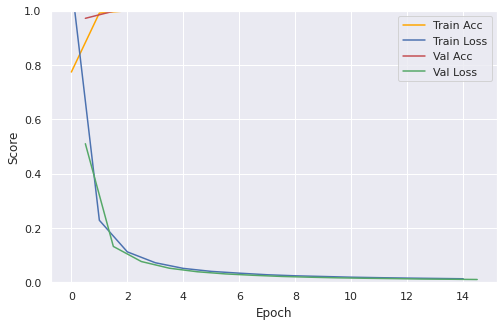

225/225 [==============================] - 5s 23ms/step


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in true_divide


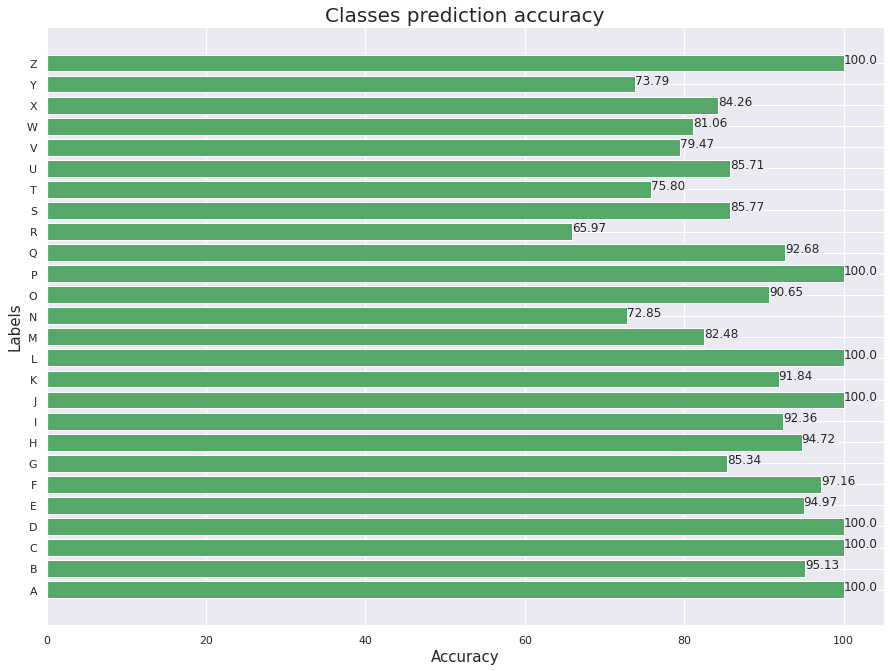

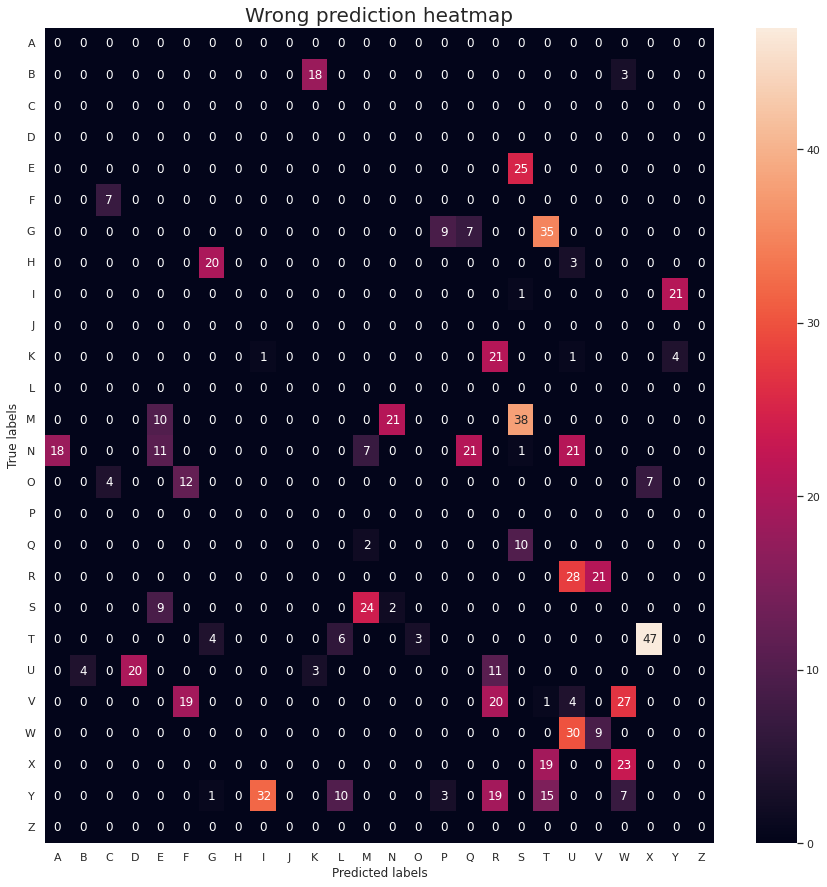

LEARNING RATE: 1e-05



>>>>>FLOPS: 1.9e+02 G
>>>>>Loss and accuracy of test set: [0.7417871952056885, 0.8409090638160706] 



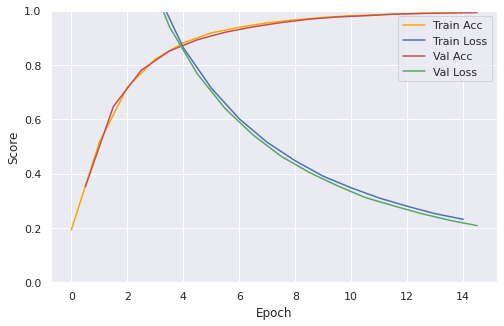

225/225 [==============================] - 5s 23ms/step


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in true_divide


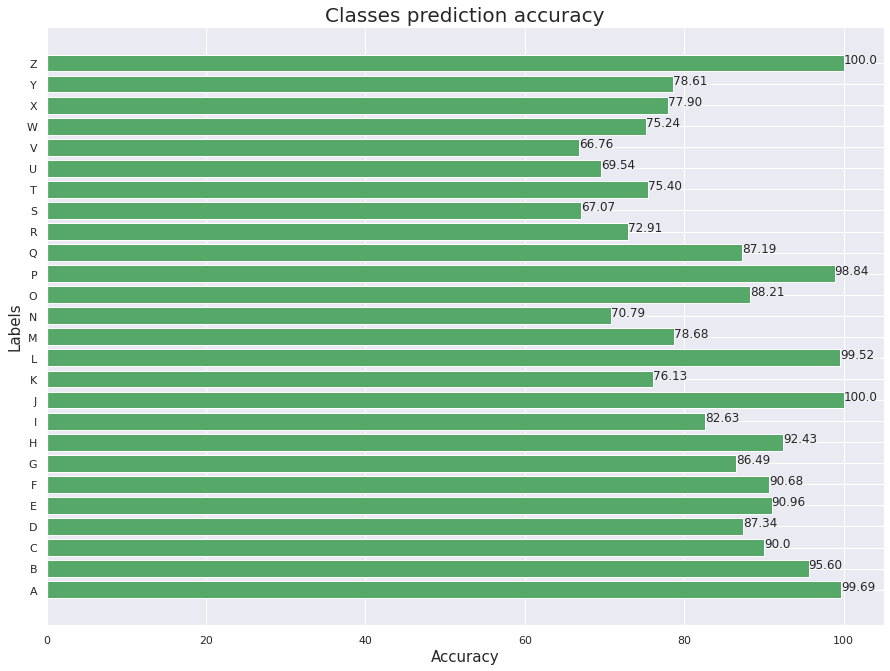

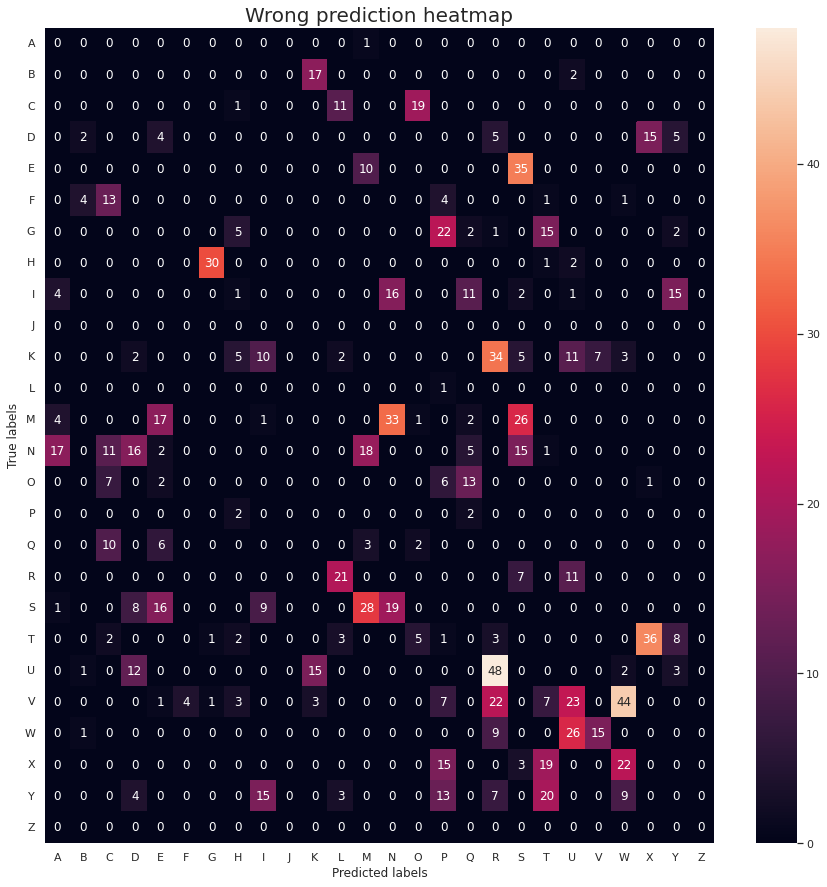

time: 1h 5min 58s (started: 2022-10-15 02:57:55 +00:00)


In [ ]:
# Learning rate test
bestModel = None
bestAcc, bestRate = 0, 0
for rate in lr:
  print(f'LEARNING RATE: {rate}\n')
  tempRes, model = evaluateModel(chosenModel( actfn, optList[0], rate), 15, batchSize[1])
  if tempRes[1] > bestAcc:
    bestAcc = tempRes[1]
    bestRate = rate
    bestModel = model

**Dicussion:**

The learning rate of 0.01 and 0.001 got nearly identical accuracy on the test set—however, the default rate of 0.01 archive better performance with higher accuracy for each class. There are no differences in FLOPs values among the three of them. Therefore, the default learning rate will be kept.

### Batch size tuning

Batch size: 16



>>>>>FLOPS: 94.8 G
>>>>>Loss and accuracy of test set: [0.14272193610668182, 0.9562186002731323] 



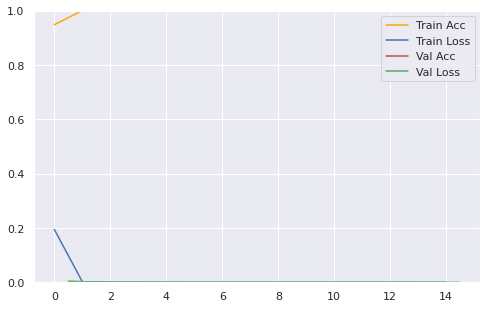

225/225 [==============================] - 5s 24ms/step


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in true_divide


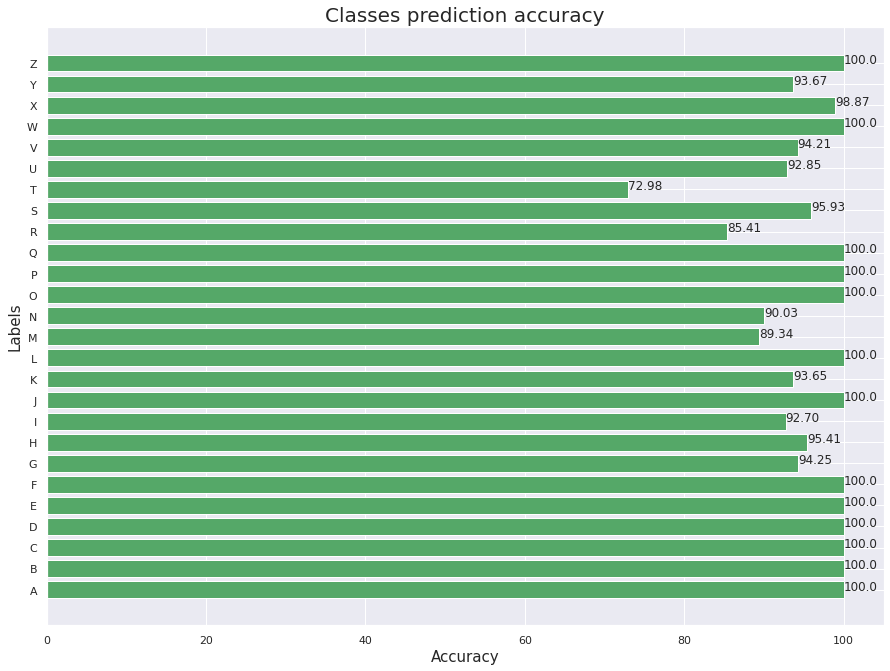

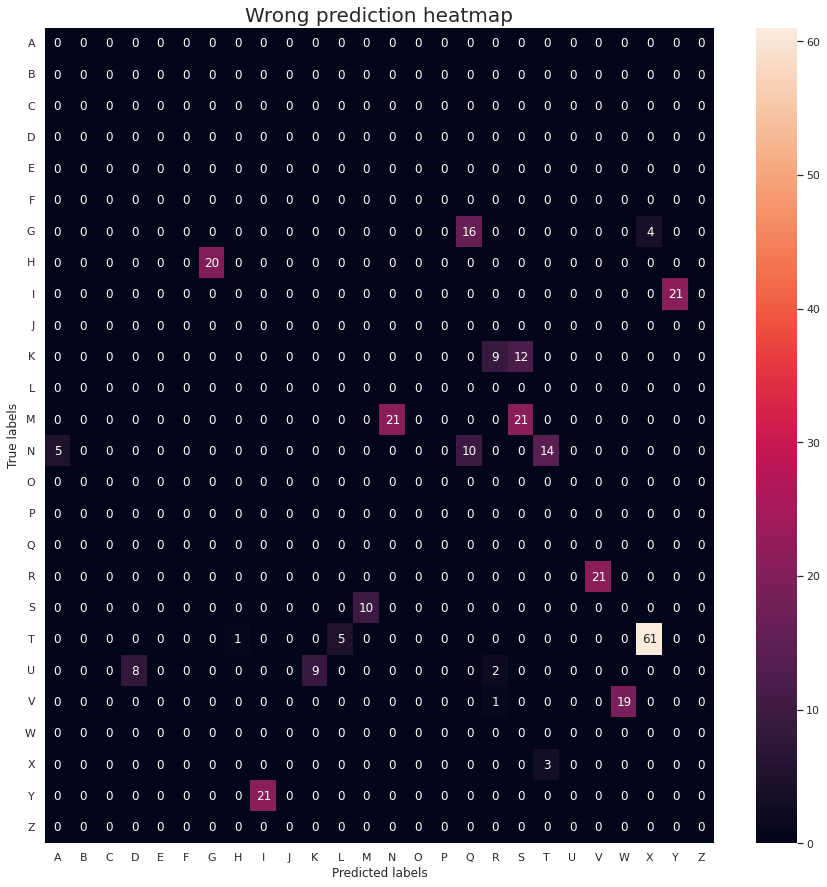

Batch size: 32



>>>>>FLOPS: 1.9e+02 G
>>>>>Loss and accuracy of test set: [0.13036173582077026, 0.9624930024147034] 



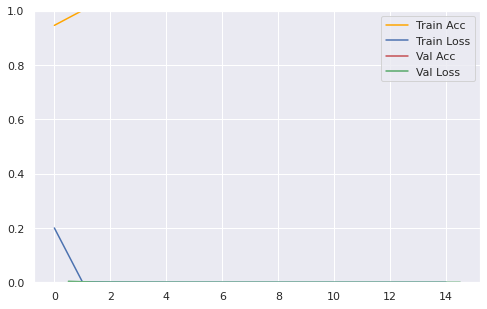

225/225 [==============================] - 5s 24ms/step


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in true_divide


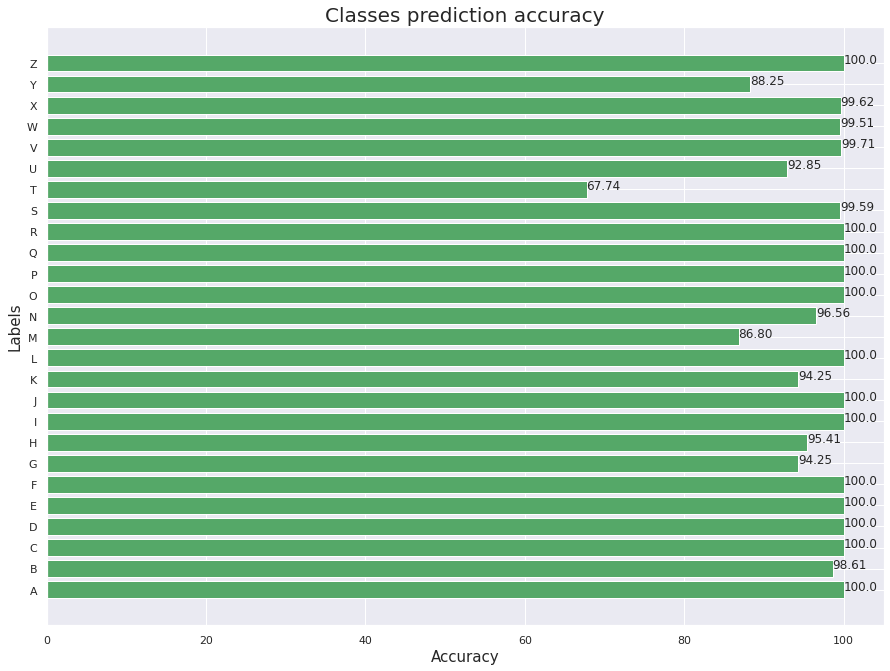

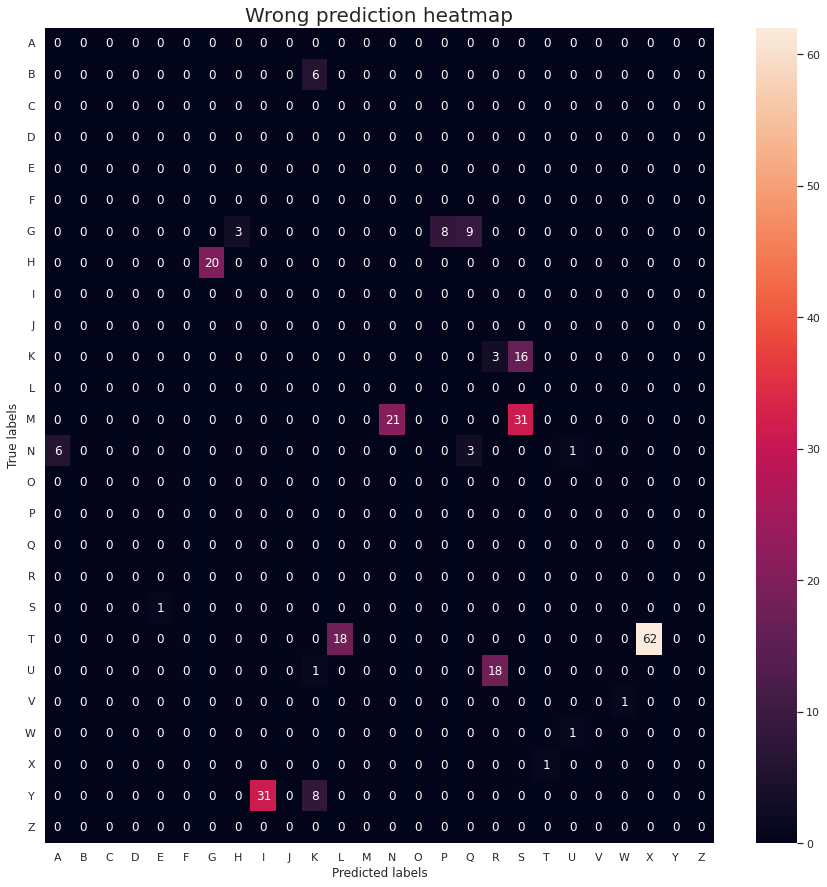

Batch size: 64



>>>>>FLOPS: 3.79e+02 G
>>>>>Loss and accuracy of test set: [0.12405414134263992, 0.9569157958030701] 



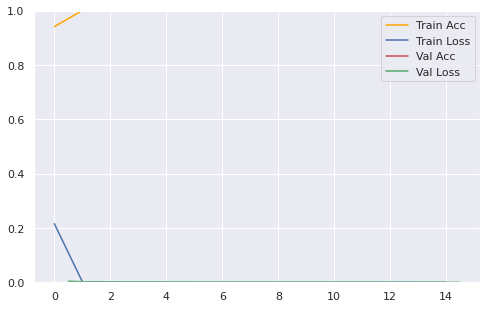

225/225 [==============================] - 5s 24ms/step


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in true_divide


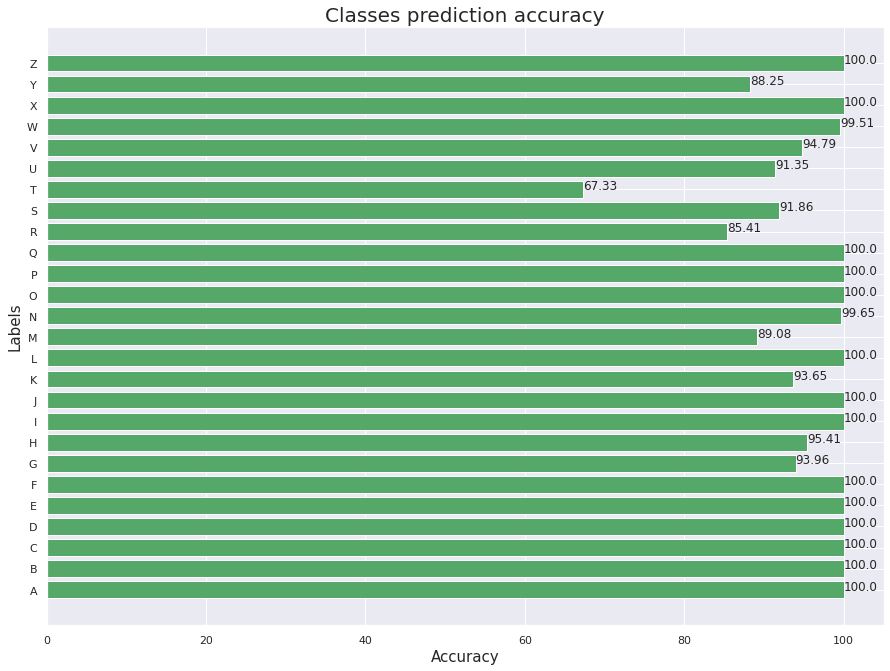

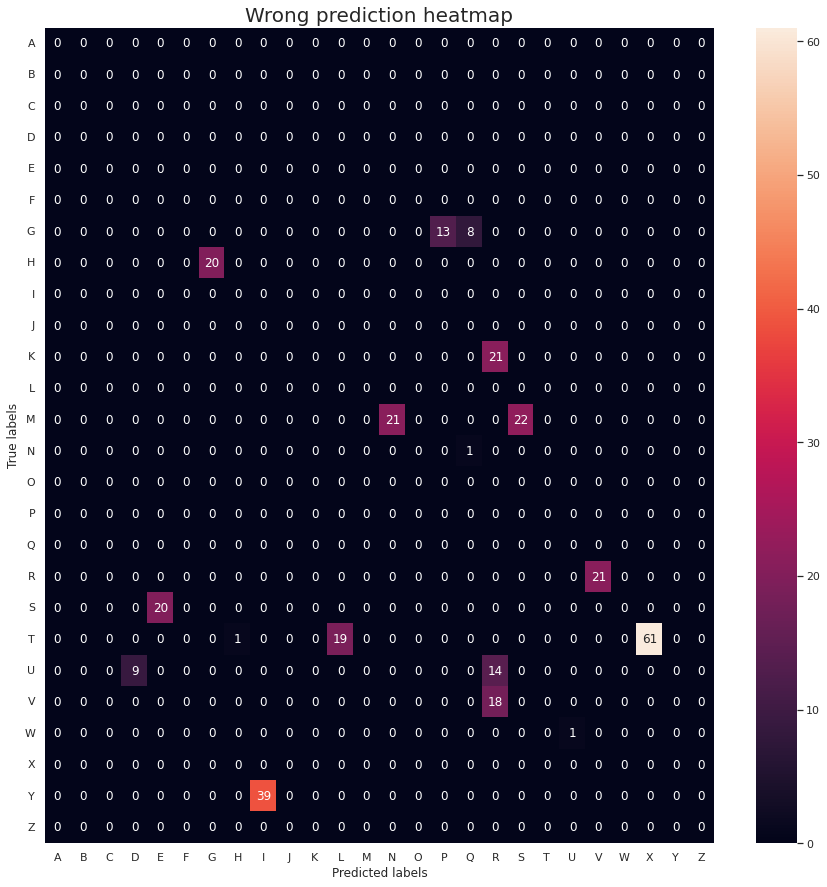

Batch size: 128



>>>>>FLOPS: 7.59e+02 G
>>>>>Loss and accuracy of test set: [0.1439715027809143, 0.9500836730003357] 



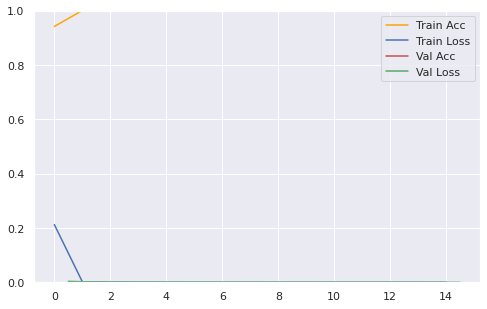

225/225 [==============================] - 5s 24ms/step


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in true_divide


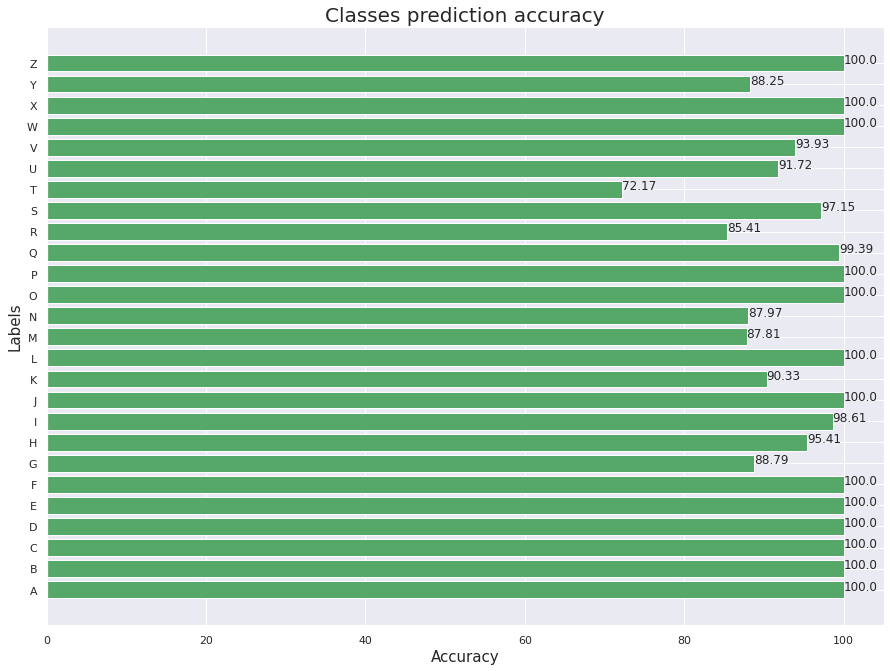

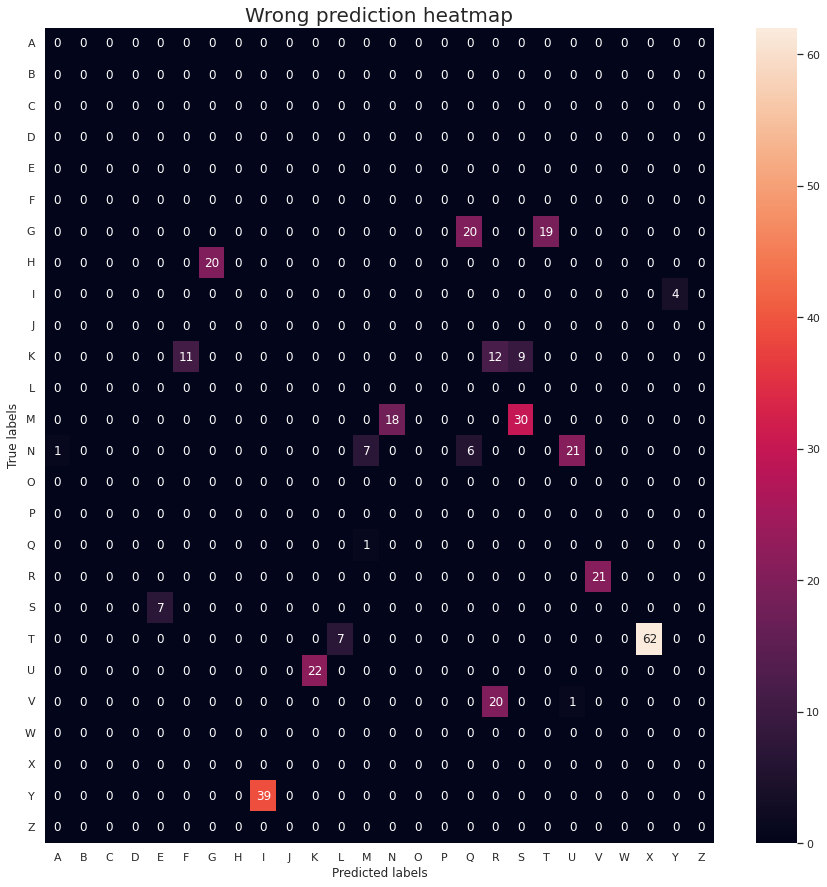

time: 1h 2min 17s (started: 2022-10-13 04:56:28 +00:00)


In [ ]:
# Tunning batch size
bestBSize =  0
for s in batchSize:
  print(f'Batch size: {s}\n')
  tempRes, model = evaluateModel(chosenModel( actfn, optList[0], bestRate), 15, s)
  if tempRes[1] > bestAcc:
    bestAcc = tempRes[1]
    bestBSize = s
    bestModel = model

**Discussion:**

When the model batch size is set as 32 and 64, it meets one of expectance - overall accuracy over 96%. The FLOPs values also rise a lot due to the batch size escalation. These batch size does not help to solve the state problem (like Y-I, T-X pairs). It could be overkill to use batch size 64 for this model. Also, the model's performance decreases with batch size 64; then, size 32 will be the choice.

The values above are the model parameter setting for the chosen model. Up to now, the model has exceeded 96% overall accuracy. However, it can not fit the desire of over 90% accuracy for each sign. Many errors are with I, Y, X, and T. Among them, the I sign has a small training set, an additional image (but should not be outnumbered compared to other sets) for the I class would improve this situation. Some other techniques can be applied like customising Min Pooling (as Keras does not have MinPooling layers), sharpening images or having deeper tuning or parameter adjustment. The dataset is in black and white. Although it has been preprocessed, pointing it will make lines outbound and shape lines more contrasted.
Moreover, if the image is on a white background, then Min Pooling will capture the feature rather than the masking of white while using Max Pooling. Due to the limited computing resources, some tests cannot perform and observe. But they can be done as the proposed idea above, some long range, or more numbers can be applied to seek better performance, (Adam optimiser with lower learning rate: 3e-4), bigger batch size like 512 or 1024. 

## Library function tuning

In [ ]:
import math
from tensorflow.keras.callbacks import LearningRateScheduler
# learning rate schedule
def step_decay(epoch, lr):
	
	drop = lr/2
	epochs_drop = 10.0
	lrate = lr * math.pow(drop, math.floor((1+epoch)/epochs_drop))
	return lrate

lrate = LearningRateScheduler(step_decay)
# Early stopping callback
early_stopping_cb = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True) 

time: 3.14 ms (started: 2022-10-15 04:03:54 +00:00)


In [ ]:
!pip install keras-tuner --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 135 kB 4.2 MB/s 
time: 4.11 s (started: 2022-10-15 04:03:54 +00:00)


In [ ]:
import tensorflow as tf
import keras_tuner
from kerastuner import HyperParameter
from kerastuner.tuners import RandomSearch, BayesianOptimization, Hyperband

# Build model for tunning
def build_model(hp):
  hp_optimizer = hp.Choice('optimizer', values=['SGD','Adam'])
  optimizer = tf.keras.optimizers.get(hp_optimizer)
  optimizer.learning_rate = hp.Choice("learning_rate", [0.1, 1e-2, 1e-3, 1e-4, 1e-5], default=0.001)

  model = keras.models.Sequential()
  model.add(keras.layers.BatchNormalization())
  model.add(keras.layers.Conv2D(filters=512, kernel_size=7, strides=1, activation=actfn, padding="same", 
                                input_shape=[28, 28, 1]))   
  model.add(keras.layers.MaxPooling2D(pool_size= 2))      
  model.add(keras.layers.BatchNormalization())   
      
  model.add(keras.layers.Conv2D(filters=512, kernel_size=5,  activation=actfn, padding="same"))  
  model.add(keras.layers.Conv2D(filters=512, kernel_size=5, padding="same"))  
  model.add(keras.layers.MaxPooling2D(pool_size= 2))     
  model.add(keras.layers.BatchNormalization())   

  model.add(keras.layers.Conv2D(filters=512, kernel_size=3, strides=1, padding="same"))  
  model.add(keras.layers.Conv2D(filters=512, kernel_size=3, strides=2, padding="same"))  

  model.add(keras.layers.Conv2D(filters=512, kernel_size=5, padding="same"))  
  model.add(keras.layers.Conv2D(filters=512, kernel_size=5,  activation=actfn, padding="same"))  

  model.add(keras.layers.MaxPooling2D(pool_size= 1))
  model.add(keras.layers.BatchNormalization())       
  model.add(keras.layers.Conv2D(filters=512, kernel_size=3, activation=actfn)) 
  
  model.add(keras.layers.Flatten()) 
  model.add(keras.layers.BatchNormalization())

  model.add(keras.layers.Dense(512))                  
  model.add(keras.layers.Dense(1024, activation=actfn))
  model.add(keras.layers.Dense(25, activation = "softmax"))   
  model.compile(
      loss="sparse_categorical_crossentropy", metrics=['accuracy'], optimizer=optimizer)
  return model

time: 113 ms (started: 2022-10-15 04:03:58 +00:00)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
hyperband_tuner = Hyperband(
    hypermodel=build_model,
    objective="val_accuracy",
    max_epochs=10,
    factor=3,
    hyperband_iterations=15,
    directory=".",
    project_name="keras_trial",
    overwrite=True
)
hyperband_tuner.search(X_train, y_train, epochs=15, validation_data=(X_val, y_val), callbacks = [early_stopping_cb,lrate])

Trial 10 Complete [00h 02m 23s]
val_accuracy: 0.04607539623975754

Best val_accuracy So Far: 1.0
Total elapsed time: 00h 22m 12s
time: 22min 12s (started: 2022-10-14 05:13:33 +00:00)


In [ ]:
best_hps=hyperband_tuner.get_best_hyperparameters(num_trials=1)[0]
print(f"""
The hyperparameter search is complete... \n
The optimal learning rate for the optimizer is {best_hps.get('learning_rate')}.\n
The optimal  optimizer is {best_hps.get('optimizer')}.
""")


The hyperparameter search is complete... 

The optimal learning rate for the optimizer is 0.0001.

The optimal  optimizer is Adam.

time: 1.41 ms (started: 2022-10-14 06:01:48 +00:00)


In [ ]:
hypermodel = hyperband_tuner.hypermodel.build(best_hps)
history = hypermodel.fit(X_train, y_train, epochs=15,batch_size = batch_size, callbacks = [early_stopping_cb,lrate],
                    validation_data=(X_val, y_val))

max_val_acc = np.max(history.history['val_accuracy'])

Epoch 1/15
687/687 [==============================] - 67s 96ms/step - loss: 0.1994 - accuracy: 0.9404 - val_loss: 0.0062 - val_accuracy: 0.9998 - lr: 1.0000e-04
Epoch 2/15
687/687 [==============================] - 65s 95ms/step - loss: 8.7600e-04 - accuracy: 0.9999 - val_loss: 7.7712e-05 - val_accuracy: 1.0000 - lr: 1.0000e-04
Epoch 3/15
687/687 [==============================] - 65s 95ms/step - loss: 1.4301e-04 - accuracy: 1.0000 - val_loss: 2.8950e-05 - val_accuracy: 1.0000 - lr: 1.0000e-04
Epoch 4/15
687/687 [==============================] - 65s 95ms/step - loss: 7.4535e-05 - accuracy: 1.0000 - val_loss: 1.7066e-05 - val_accuracy: 1.0000 - lr: 1.0000e-04
Epoch 5/15
687/687 [==============================] - 65s 94ms/step - loss: 5.8691e-05 - accuracy: 1.0000 - val_loss: 0.0027 - val_accuracy: 0.9989 - lr: 1.0000e-04
Epoch 6/15
687/687 [==============================] - 65s 94ms/step - loss: 0.1711 - accuracy: 0.9534 - val_loss: 3.5097e-04 - val_accuracy: 1.0000 - lr: 1.0000e-04
Ep

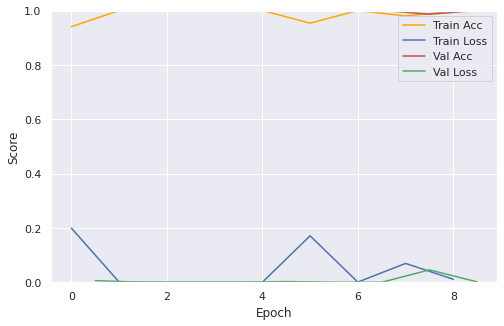

Loss and accuracy of test set: [0.09989427030086517, 0.9663971066474915] 

time: 6.23 s (started: 2022-10-14 06:11:53 +00:00)


In [ ]:
# Plot loss curve
plot_history(history)

# Loss and accuracy of test set
testres = hypermodel.evaluate(X_test, y_test, verbose=0)
print(f'Loss and accuracy of test set: {testres} \n')

In [ ]:
hypermodel.save('/Model')

time: 2.4 s (started: 2022-10-13 07:33:43 +00:00)


**Dicussion:**

Besides the previous test's callback, step-dropping learning rate schedule has been applied in training. Also, this time, instead of manually tunning, the Keras tuner library is used. In specific, Hyperband will be chosen to find the optimised hyperparameter. Different from random tuning, a good combination could be missed, then this hyperband will try to fit a large number of models with a few initial epochs. The continued condition is based on the accuracy of the validation set.

The model trained with fewer epochs in this test and got stopped early. However, the model got nearly the same accuracy as the manual tuning. Also, this process returns the chosen hyperparameters are Adam tuner, and the rate is 1e-5, which is confirmed about the rate used in the previous dicussion; also, this is a missing learning rate on manual tuning.

As the accuracy on the test set is lower than the manual tuning, the bar chart and heat map about the accuracy and miss classification will not be drawn.

#####Tuning progress summary

In [ ]:
hyperband_tuner.results_summary()

Results summary
Results in ./keras_trial
Showing 10 best trials
Trial summary
Hyperparameters:
optimizer: Adam
learning_rate: 0.0001
tuner/epochs: 2
tuner/initial_epoch: 0
tuner/bracket: 2
tuner/round: 0
Score: 1.0
Trial summary
Hyperparameters:
optimizer: Adam
learning_rate: 1e-05
tuner/epochs: 2
tuner/initial_epoch: 0
tuner/bracket: 2
tuner/round: 0
Score: 1.0
Trial summary
Hyperparameters:
optimizer: SGD
learning_rate: 0.001
tuner/epochs: 2
tuner/initial_epoch: 0
tuner/bracket: 2
tuner/round: 0
Score: 1.0
Trial summary
Hyperparameters:
optimizer: SGD
learning_rate: 0.01
tuner/epochs: 2
tuner/initial_epoch: 0
tuner/bracket: 2
tuner/round: 0
Score: 1.0
Trial summary
Hyperparameters:
optimizer: SGD
learning_rate: 0.0001
tuner/epochs: 2
tuner/initial_epoch: 0
tuner/bracket: 2
tuner/round: 0
Score: 0.9970861673355103
Trial summary
Hyperparameters:
optimizer: Adam
learning_rate: 0.001
tuner/epochs: 2
tuner/initial_epoch: 0
tuner/bracket: 2
tuner/round: 0
Score: 0.953742504119873
Trial sum

## Using augment

In [ ]:
data_augmentation = tf.keras.Sequential([
  keras.layers.RandomTranslation(height_factor=(-0.2,0.3), width_factor=(-0.2,0.3), fill_mode="nearest", interpolation="bilinear"),
  keras.layers.RandomZoom(height_factor=(-0.2,0.3), width_factor=(-0.2,0.3), fill_mode="nearest", interpolation="bilinear"),
  keras.layers.RandomContrast(factor =0.2),
  keras.layers.RandomBrightness(factor=0.2, value_range=(0.2, 1))
])

# Build model for tunning
def build_AugModel(hp):
  hp_optimizer = hp.Choice('optimizer', values=['SGD','Adam'])
  optimizer = tf.keras.optimizers.get(hp_optimizer)
  optimizer.learning_rate = hp.Choice("learning_rate", [0.1, 1e-2, 1e-3, 1e-4, 1e-5], default=0.001)

  model = keras.models.Sequential()
  model.add(data_augmentation)
  model.add(keras.layers.BatchNormalization())
  model.add(keras.layers.Conv2D(filters=512, kernel_size=7, strides=1, activation=actfn, padding="same", 
                                input_shape=[28, 28, 1]))   
  model.add(keras.layers.MaxPooling2D(pool_size= 2))      
  model.add(keras.layers.BatchNormalization())   
      
  model.add(keras.layers.Conv2D(filters=512, kernel_size=5,  activation=actfn, padding="same"))  
  model.add(keras.layers.Conv2D(filters=512, kernel_size=5, padding="same"))  
  model.add(keras.layers.MaxPooling2D(pool_size= 2))     
  model.add(keras.layers.BatchNormalization())   

  model.add(keras.layers.Conv2D(filters=512, kernel_size=3, strides=1, padding="same"))  
  model.add(keras.layers.Conv2D(filters=512, kernel_size=3, strides=2, padding="same"))  

  model.add(keras.layers.Conv2D(filters=512, kernel_size=5, padding="same"))  
  model.add(keras.layers.Conv2D(filters=512, kernel_size=5,  activation=actfn, padding="same"))  

  model.add(keras.layers.MaxPooling2D(pool_size= 1))
  model.add(keras.layers.BatchNormalization())       
  model.add(keras.layers.Conv2D(filters=512, kernel_size=3, activation=actfn)) 
  
  model.add(keras.layers.Flatten()) 
  model.add(keras.layers.BatchNormalization())

  model.add(keras.layers.Dense(512))                  
  model.add(keras.layers.Dense(1024, activation=actfn))
  model.add(keras.layers.Dense(25, activation = "softmax"))   
  model.compile(
      loss="sparse_categorical_crossentropy", metrics=['accuracy'], optimizer=optimizer)
  return model

time: 19 ms (started: 2022-10-15 04:03:58 +00:00)


In [ ]:
aug_tuner = Hyperband(
    hypermodel=build_AugModel,
    objective="val_accuracy",
    max_epochs=10,
    factor=3,
    hyperband_iterations=15,
    directory=".",
    project_name="keras_trial",
    overwrite=True
)
aug_tuner.search(X_train, y_train, epochs=15, validation_data=(X_val, y_val), callbacks = [early_stopping_cb,lrate])

Trial 10 Complete [00h 06m 34s]
val_accuracy: 0.04625751078128815

Best val_accuracy So Far: 0.9588417410850525
Total elapsed time: 01h 07m 37s
time: 1h 7min 38s (started: 2022-10-15 04:03:58 +00:00)


In [ ]:
best_augHps=aug_tuner.get_best_hyperparameters(num_trials=1)[0]
print(f"""
The hyperparameter search is complete... \n
The optimal learning rate for the optimizer is {best_augHps.get('learning_rate')}.\n
The optimal  optimizer is {best_augHps.get('optimizer')}.
""")


The hyperparameter search is complete... 

The optimal learning rate for the optimizer is 0.01.

The optimal  optimizer is SGD.

time: 707 µs (started: 2022-10-15 05:11:37 +00:00)


In [ ]:
hypermodel2 = aug_tuner.hypermodel.build(best_augHps)
history2 = hypermodel2.fit(X_train, y_train, epochs=15, callbacks = [early_stopping_cb,lrate],validation_data=(X_val, y_val))

Epoch 1/15


687/687 [==============================] - 204s 288ms/step - loss: 1.8190 - accuracy: 0.4500 - val_loss: 0.8128 - val_accuracy: 0.7299 - lr: 0.0100
Epoch 2/15
687/687 [==============================] - 194s 282ms/step - loss: 0.5543 - accuracy: 0.8186 - val_loss: 0.1024 - val_accuracy: 0.9709 - lr: 0.0100
Epoch 3/15
687/687 [==============================] - 193s 281ms/step - loss: 0.2916 - accuracy: 0.9056 - val_loss: 0.0567 - val_accuracy: 0.9842 - lr: 0.0100
Epoch 4/15
687/687 [==============================] - 192s 280ms/step - loss: 0.1828 - accuracy: 0.9425 - val_loss: 0.0377 - val_accuracy: 0.9871 - lr: 0.0100
Epoch 5/15
687/687 [==============================] - 191s 278ms/step - loss: 0.1278 - accuracy: 0.9609 - val_loss: 0.0362 - val_accuracy: 0.9876 - lr: 0.0100
Epoch 6/15
687/687 [==============================] - 192s 279ms/step - loss: 0.1012 - accuracy: 0.9681 - val_loss: 0.0051 - val_accuracy: 0.9989 - lr: 0.0100
Epoch 7/15
687/687 [==============================] - 192

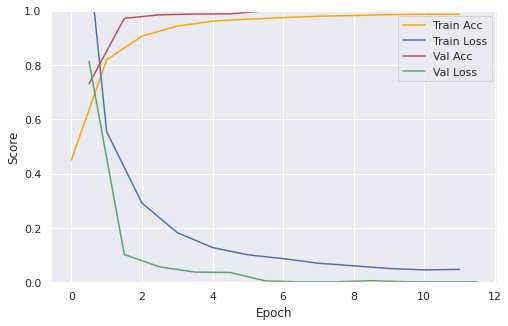

time: 229 ms (started: 2022-10-15 06:18:55 +00:00)


In [ ]:
plot_history(history2)

In [ ]:
testres = hypermodel2.evaluate(X_test, y_test, verbose=0)
print(f'Loss and accuracy of test set: {testres} \n')

Loss and accuracy of test set: [0.0029679604340344667, 1.0] 

time: 5.39 s (started: 2022-10-15 05:50:17 +00:00)


In [ ]:
# !mkdir -p saved_model
hypermodel2.save('saved_model/hypermodel2') 

time: 12.1 s (started: 2022-10-15 05:50:22 +00:00)


In [ ]:
# FLOPS reports
flops = get_flops(hypermodel2, batch_size)
print(f">>>>>FLOPS: {flops / 10 ** 9:.03} G")

>>>>>FLOPS: 1.24e-05 G
time: 6.37 s (started: 2022-10-15 05:50:34 +00:00)


**Discussion:**

The model has learned most from the dataset, and trained data set can help the model to recognise more different signatures of each sign gesture. Therefore, augmentation has been applied to generate more data with image transformation. In this specific application above, shifting, altering brightness, rescaling, shearing, and zooming are used to generate more data for training. Rotation and flipping are not chosen to apply in this case. The model might get confused due to the similarity of symmetrical gestures.  

The accuracy jumps to 98%, and there is a significant change in the accuracy of each class. The R class has the worst performance and is mainly mistaken with the G and E class. However, with the augmentation, only one class G got accuracy below 90% but quite closes to that with 89.94%.

#####Tuning with augment progress report

In [ ]:
#Tuning summary
aug_tuner.results_summary()

Results summary
Results in ./keras_trial
Showing 10 best trials
Trial summary
Hyperparameters:
optimizer: SGD
learning_rate: 0.01
tuner/epochs: 2
tuner/initial_epoch: 0
tuner/bracket: 2
tuner/round: 0
Score: 0.9588417410850525
Trial summary
Hyperparameters:
optimizer: Adam
learning_rate: 0.0001
tuner/epochs: 2
tuner/initial_epoch: 0
tuner/bracket: 2
tuner/round: 0
Score: 0.9366235733032227
Trial summary
Hyperparameters:
optimizer: SGD
learning_rate: 0.001
tuner/epochs: 2
tuner/initial_epoch: 0
tuner/bracket: 2
tuner/round: 0
Score: 0.9140411615371704
Trial summary
Hyperparameters:
optimizer: Adam
learning_rate: 1e-05
tuner/epochs: 2
tuner/initial_epoch: 0
tuner/bracket: 2
tuner/round: 0
Score: 0.9063922762870789
Trial summary
Hyperparameters:
optimizer: SGD
learning_rate: 0.0001
tuner/epochs: 2
tuner/initial_epoch: 0
tuner/bracket: 2
tuner/round: 0
Score: 0.5784010291099548
Trial summary
Hyperparameters:
optimizer: Adam
learning_rate: 0.001
tuner/epochs: 2
tuner/initial_epoch: 0
tuner/

## Limitation

The images in the dataset only have one channel; therefore, they are not tested on the pre-trained model and got transfer learning due to their different channels. Therefore, theoretically, they are deployable; however, the accuracy might not guarantee, or it will require more processing to support the transfer. Their model structure can be reused and opened for further study. The preprocessing (augmentation) is tested with the shown value. Various combinations could be applied for this model, or some augmentation can be added, like adding noise and adjusting contrast.
Besides the batch normalisation technique for improvement, there is another approach which is drop out. This regularisation technique randomly selects neurons and ignores them. Therefore, in some interactions, the squared norm of weights will shrink down. The network will try to tune and find the features specified for target classes through the way the network learns. Some drops out will help the model to avoid strictly sticking to the specialisation, which could lead to overfitting. This technique was not applied in the experiments. It could give out similar results to batch normalisation. But it might conflict to combine both of them.

There are several other techniques like different activation functions (ELU, PReLU, ...), normalisation ( unit normalisation, layer normalisation), and regularisation (alpha dropout, Gaussian dropout, activity regularisation, ...) were not tested in this assignment. They could deliver the same result or better performance when put in the right place.

##Conclusion

Several experiments have been gone through. These tests include full connected layers test only, adding up with convolution network, batch normalisation layer, manually or automatically tuning, and augmentation. The accuracy on the test set starts from 67.80\% with the initial model design and reaches absolute value with the different implementations of augmentation. Without the augmentation, several hyper-parameters are set up for similar performance with Adam - 0.00001 or 0.0001, SGD - 0.01 or 0.001. When using augmentation, the best hyperparameters for the model are SGD and learning rate at 0.01, batch size 32. The more layers models have, the more dedicated parameter adjustment and layer arranging to extract the most from the dataset. Dataset richness is also an essential factor in computer vision tasks. That's why model set-up and configuration are critical to task performance for accuracy, the computing resource economy, and time-saving, as shown in the experiments.